# Inteligentná analýza údajov

## Prvá fáza semestrálneho projektu: Prieskumná analýza

In [280]:
import pandas as pd
import random
import numpy as np
from numpy import percentile
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

# Príprava dataframe-ov

In [19]:
#načítanie datasetov
filename1 = "Dataset/other_train.csv"
filename2 = "Dataset/personal_train.csv"
filename3 = "Dataset/other_valid.csv"
filename4 = "Dataset/personal_valid.csv"
df_raw = pd.read_csv(filename1)
df = pd.read_csv(filename1)
df_pt = pd.read_csv(filename2)
dfv = pd.read_csv(filename3)
df_pv = pd.read_csv(filename4)

dataframe_merged = pd.DataFrame()
dataframe_train = pd.DataFrame()
dataframe_valid = pd.DataFrame()

In [4]:
# data v medical_info sú nepoužitelné v danej forme
# preto sme museli tento stĺpec rozdeliť do viacerých tak aby sme s dátami mohli pracovať

def medinfofun(text):
        if "{" in str(text):
            text = text.translate({ord(i): None for i in "{}'"})
            text = text.split(',')
            new = []
            names = [['mean_glucose'], ['std_glucose'], ['kurtosis_glucose'], ['skewness_glucose'], ['mean_oxygen'],
                     ['std_oxygen'], ['kurtosis_oxygen'], ['skewness_oxygen']]
            for x in text:
                new.append(x.split(':'))
            for a in range(len(new)):
                names[a].append(new[a][1])

            return pd.Series([names[0][1], names[1][1], names[2][1], names[3][1], names[4][1],
                              names[5][1], names[6][1], names[7][1]])
        return pd.Series('0')

    
#funkcia pre naformatovanie dat v medical_info a priradenie dát do novovytvorených stĺpcov
class spracovanie_medinfo():
    def __init__(self):
        print(self)
        pass
    
    
        
    
    def fit(self, dataf_o, dataf_p, y=None):
        nazvy = ['mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose', 'mean_oxygen',
                 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']

        #vytvorenie stĺpcov
        for nazov in nazvy:
            dataf_o[nazov] = pd.Series('', index=dataf_o.index)
        dataf_o[['mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose', 'mean_oxygen',
            'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']] = dataf_o.medical_info.apply(medinfofun).astype(float)
        return self
    
    def transform(self, X):
        return X

In [3]:
# upravený dataframe z csv other_train
df.head()

Unnamed: 0            name  \
0           0  Charles Foster   
1           1    Kelly Presha   
2           2     Fred Morris   
3           3     Lance Black   
4           4    Joseph Nance   

                                            address    race  \
0            475 Chris Cliff\r\nNew Aaron, MN 28762   Black   
1         868 Victoria Pine\r\nSarahmouth, HI 89920   White   
2      986 Jessica Lodge\r\nLake Maryland, GA 86175   White   
3  5504 Cook Pass Suite 642\r\nJosephside, AL 44758   White   
4         2440 Haynes Ferry\r\nSamuelstad, RI 51752   White   

        marital-status        occupation pregnant  education-num  \
0   Married-civ-spouse                 ?        f            1.0   
1   Married-civ-spouse      Craft-repair        f            9.0   
2             Divorced      Adm-clerical      NaN            9.0   
3   Married-civ-spouse   Farming-fishing        f            4.0   
4   Married-civ-spouse      Tech-support        F            9.0   

     relationship  capital-gain   education    fnlwgt  class  income  \
0         Husband           0.0   Preschool  293385.0    0.0   <=50K   
1         Husband           0.0     HS-grad  189922.0    1.0   <=50K   
2   Not-in-family           0.0     HS-grad  198388.0    0.0   <=50K   
3         Husband           0.0     7th-8th  184335.0    0.0   <=50K   
4            Wife           0.0     HS-grad  153451.0    0.0    >50K   

                                        medical_info  native-country  \
0  {'mean_glucose':'115.171875','std_glucose':'55...   United-States   
1  {'mean_glucose':'8.75','std_glucose':'30.95838...   United-States   
2  {'mean_glucose':'103.734375','std_glucose':'45...   United-States   
3  {'mean_glucose':'111.15625','std_glucose':'45....   United-States   
4  {'mean_glucose':'99.4296875','std_glucose':'43...   United-States   

   hours-per-week  capital-loss          workclass  
0            30.0           0.0                  ?  
1            40.0           0.0            Private  
2            40.0           0.0            Private  
3            30.0           0.0   Self-emp-not-inc  
4            40.0        1887.0          State-gov

In [339]:
# dataframe z csv personel_train
df_pt.head()

Unnamed: 0             name  \
0           0  Roscoe Bohannon   
1           1     Ernest Kline   
2           2  Harold Hendriks   
3           3   Randy Baptiste   
4           4  Anthony Colucci   

                                             address  age      sex  \
0  7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...  NaN     Male   
1  391 Ball Road Suite 961\r\nFlowersborough, IN ...   66   Female   
2     8702 Vincent Square\r\nNew Jerryfurt, CO 30614   48   Female   
3     2751 Harris Crossroad\r\nWest Ashley, CA 30311   62   Female   
4  904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...   30     Male   

  date_of_birth  
0    1976-11-28  
1    1953/05/02  
2    1971-06-15  
3    1957-02-05  
4    1989-10-13

In [5]:
# vykonáme merge nad našimi dvomi datasetmi na základe mena a adresy
class spoj_datasety():
    def __init__(self):
        pass
    
    def fit(self, dataf_o, dataf_p, y=None):   
        dataf_o = dataf_o.drop('medical_info', 1)
        dataf_o = dataf_o.drop('Unnamed: 0', 1)
        dataf_p = dataf_p.drop('Unnamed: 0', 1)
        
        global dataframe_merged
        dataframe_merged = pd.merge(dataf_o, dataf_p, on=['name', 'address'])
        
        return self
    
    def transform(self, X):
        return X

# Základný opis dát spolu s ich charakteristikami

In [4]:
# tieto počty nám naznačujú že v other_train sú nejaké osoby viackrát 
# alebo je tam o 50 osôb viac ako v personel_train datasete

pocet_riadkov, pocet_stlpcov = df.shape
print("Počet záznamov v other_train:",pocet_riadkov)
print("Počet atribútov v other_train:",pocet_stlpcov)

pocet_riadkov, pocet_stlpcov = df_pt.shape
print("\nPočet záznamov v personel_train:",pocet_riadkov)
print("Počet atribútov v personel_train:",pocet_stlpcov)

Počet záznamov v other_train: 3983
Počet atribútov v other_train: 19

Počet záznamov v personel_train: 3933
Počet atribútov v personel_train: 6


In [342]:
# informácie ohladom other_train dataframe-u
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3983 non-null   int64  
 1   name            3983 non-null   object 
 2   address         3983 non-null   object 
 3   race            3962 non-null   object 
 4   marital-status  3966 non-null   object 
 5   occupation      3959 non-null   object 
 6   pregnant        3967 non-null   object 
 7   education-num   3976 non-null   float64
 8   relationship    3972 non-null   object 
 9   capital-gain    3965 non-null   float64
 10  education       3962 non-null   object 
 11  fnlwgt          3964 non-null   float64
 12  class           3963 non-null   float64
 13  income          3963 non-null   object 
 14  medical_info    3967 non-null   object 
 15  native-country  3966 non-null   object 
 16  hours-per-week  3968 non-null   float64
 17  capital-loss    3959 non-null   f

In [87]:
# informácie ohladom personal_train dataframe-u
df_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3933 non-null   object
 1   address        3933 non-null   object
 2   age            3670 non-null   object
 3   sex            3933 non-null   object
 4   date_of_birth  3933 non-null   object
dtypes: object(5)
memory usage: 76.9+ KB


In [88]:
#štatistické hodnoty čiselných atribútov (other_train)

include =['float']
desc = df.describe(include = include)
desc

education-num  capital-gain        fnlwgt        class  hours-per-week  \
count    3976.000000   3965.000000  3.964000e+03  3963.000000     3968.000000   
mean       10.068913   1165.191173  1.910926e+05     0.255362       40.384325   
std         2.660549   7991.492407  1.075397e+05     0.436120       12.498116   
min         1.000000      0.000000  1.989900e+04     0.000000        1.000000   
25%         9.000000      0.000000  1.189220e+05     0.000000       40.000000   
50%        10.000000      0.000000  1.793445e+05     0.000000       40.000000   
75%        13.000000      0.000000  2.351010e+05     1.000000       45.000000   
max        16.000000  99999.000000  1.484705e+06     1.000000       99.000000   

       capital-loss  mean_glucose  std_glucose  kurtosis_glucose  \
count   3959.000000   3587.000000  3967.000000       3967.000000   
mean      88.021723    100.900239    72.643784          0.948002   
std      411.623025     34.080150  1454.257388          1.607876   
min        0.000000      0.000000 -7110.621457         -1.641515   
25%        0.000000     87.402344    39.434675          0.072237   
50%        0.000000    110.664062    45.936325          0.310784   
75%        0.000000    124.089844    51.021751          0.773769   
max     4356.000000    189.734375  7678.445784          8.069522   

       skewness_glucose  mean_oxygen   std_oxygen  kurtosis_oxygen  \
count       3967.000000  3967.000000  3967.000000      3967.000000   
mean           4.201711    18.519389    31.187359         7.407227   
std            9.652821    34.864148    22.318089         4.808268   
min           -1.755332     0.213211     7.370432        -2.597872   
25%           -0.119656     2.065635    15.049218         3.637833   
50%            0.372981     3.237458    20.594663         7.780317   
75%            2.080120    12.639632    43.237478        10.259026   
max           68.101622   217.371238   110.642211        34.539844   

       skewness_oxygen  
count      3967.000000  
mean         91.138720  
std         108.297251  
min          -1.976976  
25%          12.867870  
50%          68.338302  
75%         126.895481  
max        1191.000837

In [89]:
#štatistické hodnoty atribútov typu object (other_train)
#tu si môžeme všimnúť, že stĺpec address uchováva viacero údajov ktoré by sme mali do ďaľšej fázy rozdeliť
include =['object'] 
desc = df.describe(include = include)
desc

name                                 address    race  \
count            3983                                    3983    3962   
unique           3933                                    3933       5   
top     Shaun Juckett  578 Edward Roads\r\nHornland, MI 25975   White   
freq                3                                       3    3366   

             marital-status       occupation pregnant relationship education  \
count                  3966             3959     3967         3972      3962   
unique                    7               14        6            6        16   
top      Married-civ-spouse   Prof-specialty        f      Husband   HS-grad   
freq                   1852              524     3492         1636      1228   

        income  native-country workclass  
count     3963            3966      3968  
unique       2              39         9  
top      <=50K   United-States   Private  
freq      2964            3560      2767

In [389]:
#štatistické hodnoty čiselných atribútov v personel_train nemáme žiadne keďže age nemá typ float64 ale object

In [90]:
#štatistické hodnoty atribútov typu object (personel_train)
include =['object'] 
desc = df_pt.describe(include = include)
desc

name                                         address   age  \
count              3933                                            3933  3670   
unique             3933                                            3933    84   
top     Richard Edwards  310 Cody Dam Apt. 545\r\nPort Daniel, WY 36067    53   
freq                  1                                               1   136   

          sex date_of_birth  
count    3933          3933  
unique      2          3705  
top      Male    1973-01-29  
freq     2614             4

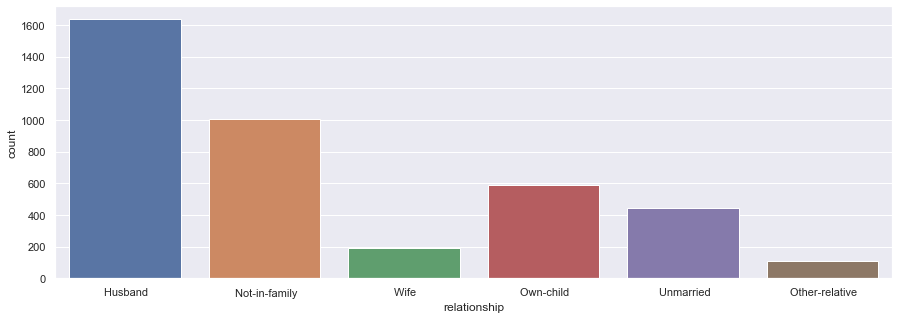

In [39]:
# v datasete sa vyskytuje z pomedzi osôb najviac manželov
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(x='relationship', data=df)

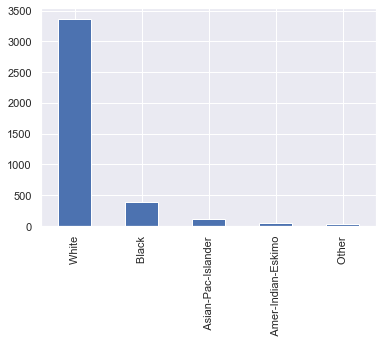

In [40]:
#rôznorodosť rás v datasete - prevažnú väčšinu populácie tvorí biela rasa
df["race"].value_counts().plot(kind='bar')

# Párová analýza dát

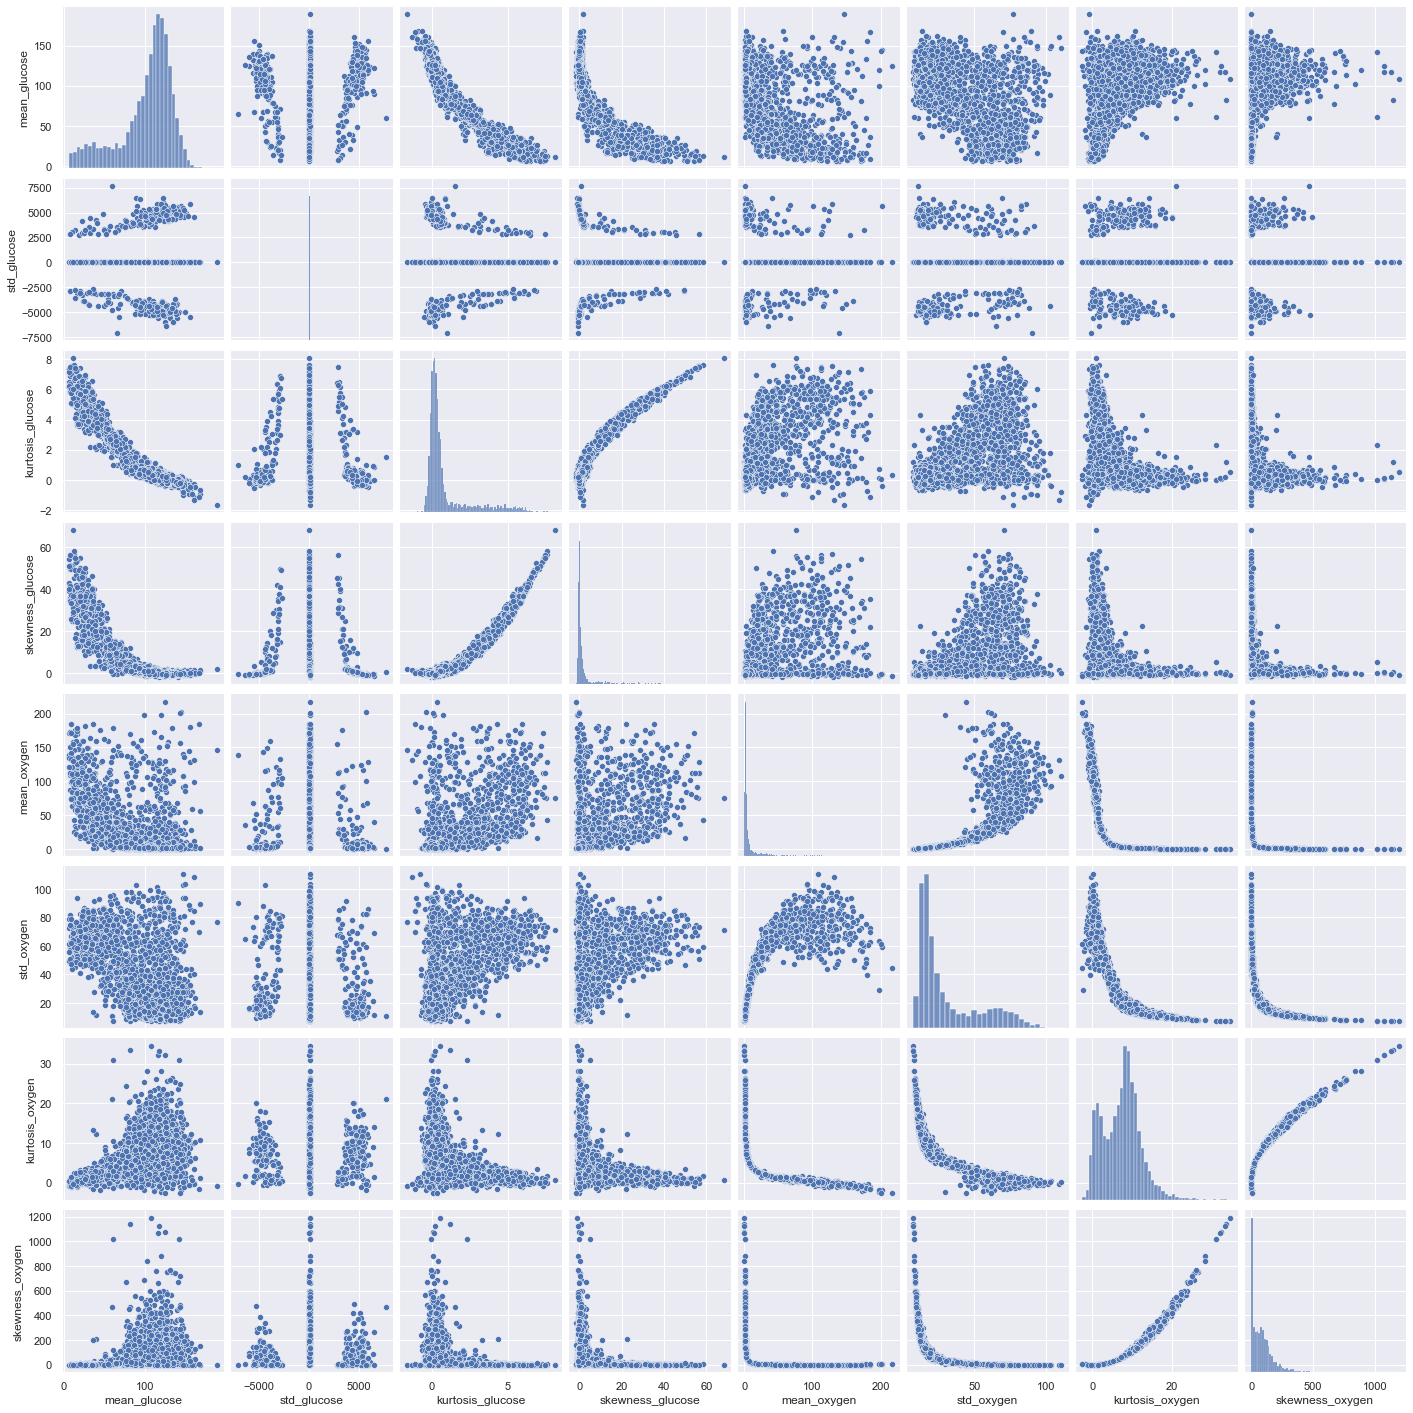

In [41]:
# možné vzťahy medzi hlavnými atribútmi
sns.pairplot(df.dropna()[['mean_glucose', 
                          'std_glucose', 
                          'kurtosis_glucose', 
                          'skewness_glucose',
                          'mean_oxygen',
                          'std_oxygen',
                          'kurtosis_oxygen',
                          'skewness_oxygen']])

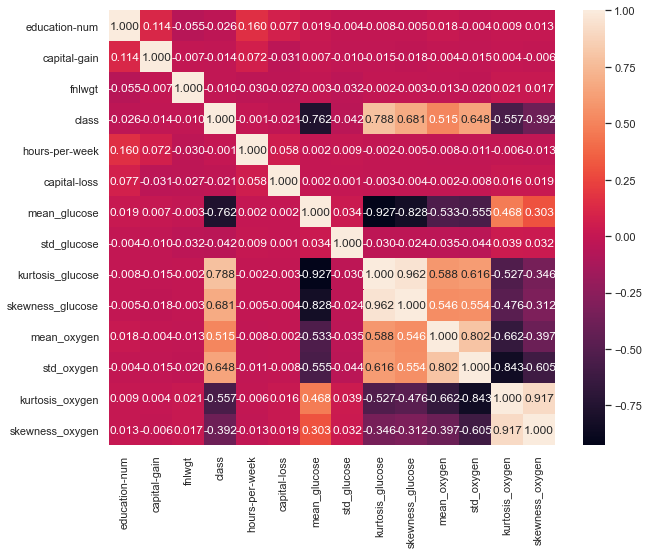

In [42]:
# heatmap graf nám pomôže prísť na to kroré atribúty medzi sebou majú akú koreláciu
# na základe tohto grafu si vieme vybrať tie zaujímavé kombinácie atribútov s negatívnou alebo pozitívnou koreláciou
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".3f")

Pearson correlation: -0.927


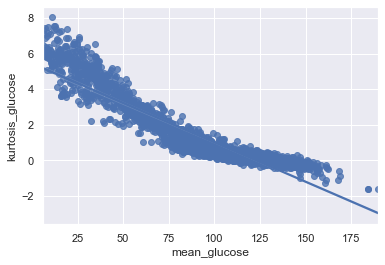

In [43]:
# môžeme vidieť že medzi mean_glucose a kurtosis_glucose ide o silne negatívnu koreláciu
sns.regplot(x="mean_glucose", y="kurtosis_glucose", data=df)
print("Pearson correlation: %.3f" % df['mean_glucose'].corr(df['kurtosis_glucose']))

Pearson correlation: 0.962


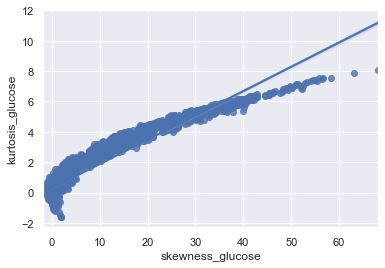

In [44]:
# môžeme vidieť že medzi skewness_glucose a kurtosis_glucose ide o silne pozitívnu koreláciu
sns.regplot(x="skewness_glucose", y="kurtosis_glucose", data=df)
print("Pearson correlation: %.3f" % df['skewness_glucose'].corr(df['kurtosis_glucose']))

Pearson correlation: 0.788


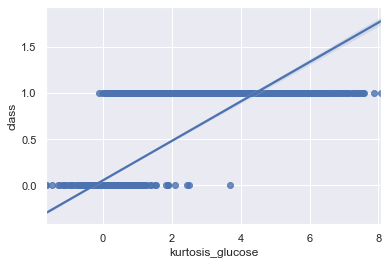

In [45]:
# medzi kurtosis_glucose a class - silná korelácia
sns.regplot(x="kurtosis_glucose", y="class", data=df)
print("Pearson correlation: %.3f" % df['kurtosis_glucose'].corr(df['class']))

c:\users\andre\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

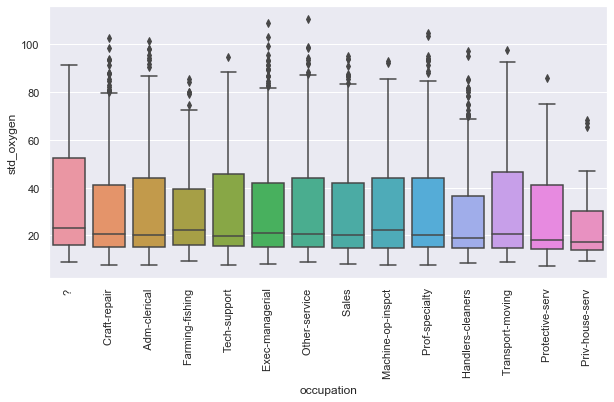

In [46]:
# ako sa líšia std_oxygen hodnoty pri jednotlivých pracovných miest
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot('occupation', 
            'std_oxygen', 
            data=df)
pylab.xticks(rotation=90)

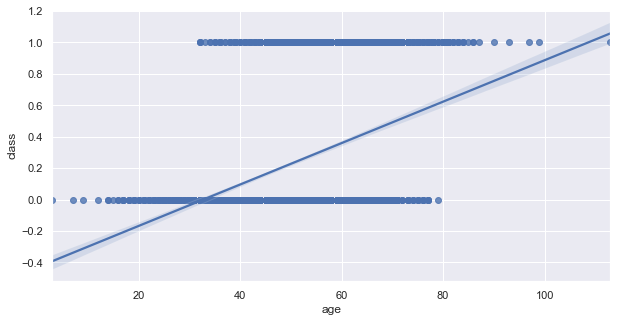

In [47]:
# môžeme vidieť že s pribúdajúcim vekom rastie aj výskyt cukrovky
df_both['age'] = df_both['age'].replace('??', np.NaN)
df_both['age'] = df_both['age'].astype(float)
sns.regplot(x="age", y="class", data=df_both)

Všetci muži: 2649 , počet mužov s cukrovkou: 649 , percentuálne vyjadrenie  24.499811249528126 %
Všetky ženy: 1334 , počet žien s cukrovkou: 363 , percentuálne vyjadrenie  27.211394302848575 %


c:\users\andre\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


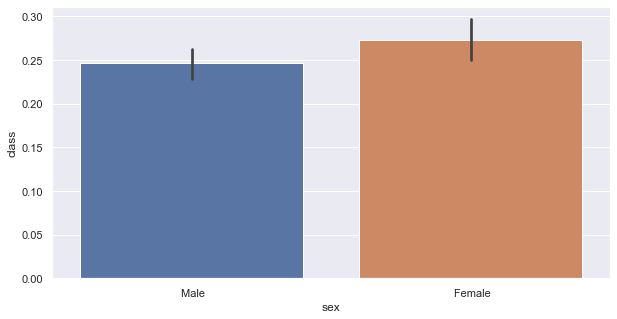

In [48]:
# 25% zo všetkych mužov z nášho datasetu a 27.2% zo všetkých žien má cukrovku

muzi,zeny = df_both.sex.value_counts()
muzi_c,zeny_c = df_both[df_both['class'] == 1.00].sex.value_counts()

print("Všetci muži:",muzi,", počet mužov s cukrovkou:",muzi_c, ", percentuálne vyjadrenie ",muzi_c/muzi*100,"%")
print("Všetky ženy:",zeny,", počet žien s cukrovkou:",zeny_c, ", percentuálne vyjadrenie ",zeny_c/zeny*100,"%")

sns.barplot(df_both['sex'], df_both['class'], data=df_both)

# Hypotézy

## 1. hypotéza

In [ ]:
# 1. H0 : Ľudia s cukrovkou nemajú v priemere vyžšie hodnoty skewness_glucose ako zdravý ludia
#    H1 : Ľudia s cukrovkou majú v priemere vyžšie hodnoty skewness_glucose ako zdravý ludia

In [91]:
# vytvoríme si naša vzorky
sample_size = 100

chori_ludia = df[df['class']==1.00].skewness_glucose
zdravi_ludia = df[df['class']==0.00].skewness_glucose
chori_ludia = chori_ludia.dropna()
zdravi_ludia = zdravi_ludia.dropna()

# test môžeme vykonať so všetkými údajmi alebo si môžeme spraviť menšie vzorky a testy opakovať s rôznou velkosťou
#chori_ludia = chori_ludia.sample(n=sample_size, replace=False)
#zdravi_ludia = zdravi_ludia.sample(n=sample_size, replace=False)

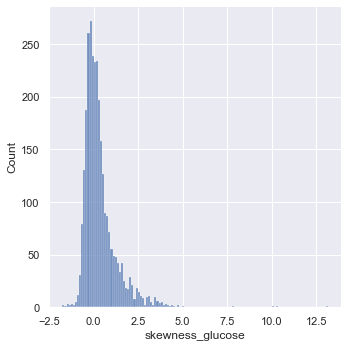

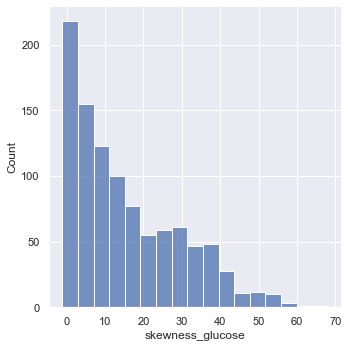

In [92]:
sns.displot(zdravi_ludia)
sns.displot(chori_ludia)

In [51]:
zdravi_ludia.mean()

0.3570110759595376

In [52]:
chori_ludia.mean()

15.46131114433697

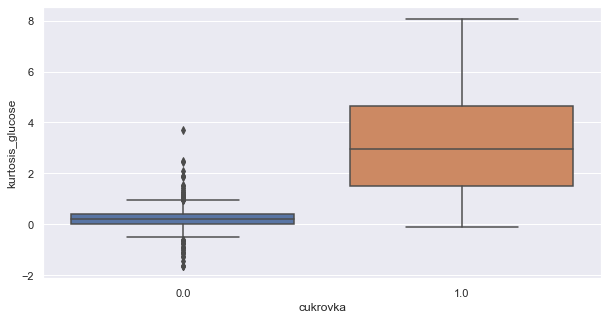

In [53]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x='class', y='kurtosis_glucose', data=df).set(xlabel='cukrovka', ylabel='kurtosis_glucose')
plt.show()

In [ ]:
# teraz zistíme či ide o normálové distribúcie alebo iné distribúcie pomocou Shapiro-Wilk testu

c:\users\andre\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.7885728478431702, pvalue=0.0)
Another distributions (reject H0)


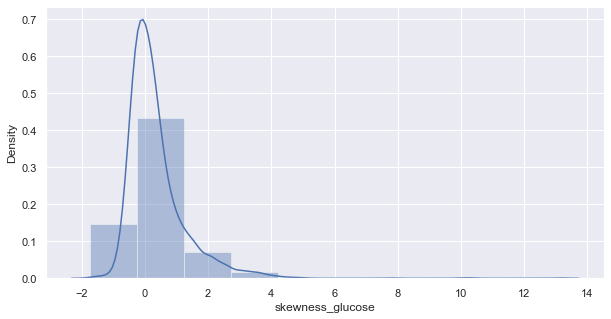

In [54]:
# test pre vzorku zdravých ľudí

sns.distplot(zdravi_ludia, bins=10)

shapiro_test = shapiro(zdravi_ludia)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

c:\users\andre\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9006683826446533, pvalue=4.80037884564123e-25)
Another distributions (reject H0)


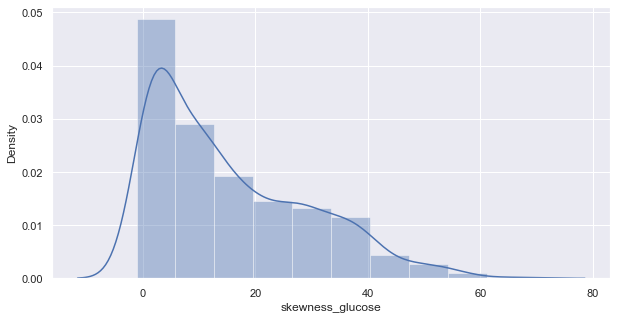

In [55]:
# test pre vzorku ľudí s cukrovkou

sns.distplot(chori_ludia, bins=10)

shapiro_test = shapiro(chori_ludia)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

In [251]:
# zistili sme že abe rozdelenia niesú normálne takže môžme spraviť Mann-Whitneyho test

In [56]:
# porovnanie vzoriek
stats.mannwhitneyu(chori_ludia, zdravi_ludia) 

MannwhitneyuResult(statistic=163358.0, pvalue=0.0)

In [ ]:
# z Mann-Whitney testu sme zistili že H0 zamietame pretože hodnota p je strašne malá (p < 0,005)
# platí H1

## 2. hypotéza

In [505]:
# 1. H0 : Starší (>=65) ľudia majú vyžšie priemerné hodnoty cukru v krvi ako (<65) mladši.
#    H1 : Starší (>=65) ľudia nemajú vyžšie priemerné hodnoty cukru v krvi ako (<65) mladši.

In [57]:
# pre túto hypotézu si musíme transromovať dáta age do typu int

df_both['age'] = df_both['age'].replace('??', np.NaN)
df_both['age'] = df_both['age'].astype(float)

In [58]:
# teraz si môžeme vytvoriť vzorky
sample_size = 500

mladsi_ludia = df_both[df_both['age']<65].mean_glucose
starsi_ludia = df_both[df_both['age']>=65].mean_glucose

mladsi_ludia = mladsi_ludia.dropna()
starsi_ludia = starsi_ludia.dropna()

# pre prípadné vzorkovanie populácie
#mladsi_ludia = mladsi_ludia.sample(n=sample_size, replace=False)
#starsi_ludia = starsi_ludia.sample(n=sample_size, replace=False)

In [59]:
print("Priemerná glukóza u starších ľudí:",starsi_ludia.mean())
print("Priemerná glukóza u mladších ľudí:",mladsi_ludia.mean())

Priemerná glukóza u starších ľudí: 83.32684125586854
Priemerná glukóza u mladších ľudí: 103.55772025939177


c:\users\andre\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\andre\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


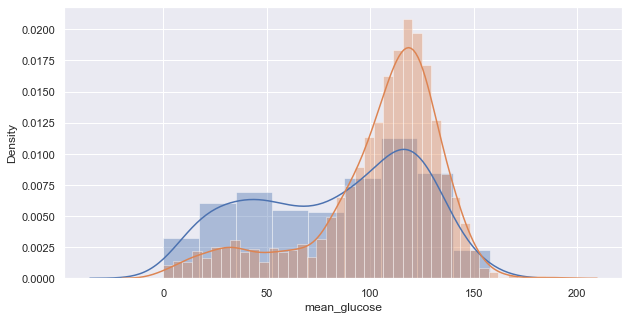

In [60]:
sns.distplot(starsi_ludia)
sns.distplot(mladsi_ludia)

In [ ]:
# teraz zistíme či ide o normálové distribúcie alebo iné distribúcie pomocou Shapiro-Wilk testu

ShapiroResult(statistic=0.9484632611274719, pvalue=5.088167040478986e-11)
Another distributions (reject H0)


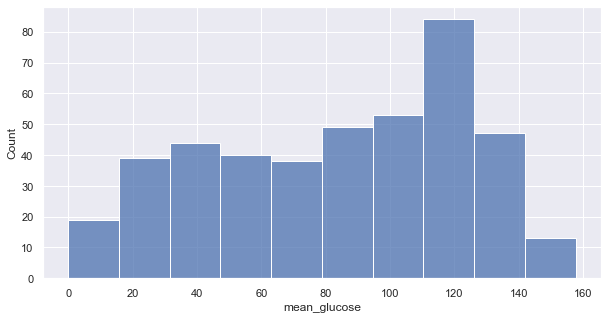

In [61]:
# test pre vzorku starších ľudí

sns.histplot(starsi_ludia, bins=10)

shapiro_test = shapiro(starsi_ludia)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.8906108736991882, pvalue=1.0566771329934148e-40)
Another distributions (reject H0)


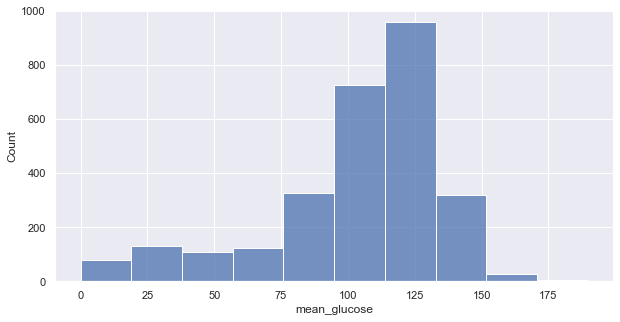

In [62]:
# test pre vzorku mladších ľudí

sns.histplot(mladsi_ludia, bins=10)

shapiro_test = shapiro(mladsi_ludia)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

In [ ]:
# zistili sme zo shapirovho testu že obe hodnoty niesú normálneho rozdelenia takže môžeme vykonať Mann-Whitneyon test
# (ak by sa ukázali naše vzorky že sú z normálnej distribúcie tak by sme vykonali Študentov T-test)

In [63]:
mannwhitneyu(mladsi_ludia, starsi_ludia)

MannwhitneyuResult(statistic=419819.0, pvalue=4.789924547338472e-23)

In [ ]:
# test ukázal že hodnota pvalue je nízka, čo znamená že H0 opäť nepotvrdzujeme

# Identifikácia problémov v dátach

In [93]:
# v pôvodnom dataframe z other_train.csv boli dáta o cukrovke schované v medical_info
df_raw.medical_info
# pre umožnenie práce s nimi sme museli tento column rozdeliť do podoby s ktorou teraz pracujeme

0       {'mean_glucose':'115.171875','std_glucose':'55...
1       {'mean_glucose':'8.75','std_glucose':'30.95838...
2       {'mean_glucose':'103.734375','std_glucose':'45...
3       {'mean_glucose':'111.15625','std_glucose':'45....
4       {'mean_glucose':'99.4296875','std_glucose':'43...
                              ...                        
3978    {'mean_glucose':'104.5859375','std_glucose':'3...
3979    {'mean_glucose':'96.3125','std_glucose':'39.61...
3980    {'mean_glucose':'126.5859375','std_glucose':'4...
3981    {'mean_glucose':'121.5234375','std_glucose':'4...
3982    {'mean_glucose':'125.8046875','std_glucose':'5...
Name: medical_info, Length: 3983, dtype: object

In [95]:
# 1. problém je v tom, že niektoré osoby sa v datasete vyskytujú viackrát (2-3 Fred Morris, 9-10 Maurice Riley)
#     čo následne skresluje výsledky našeho snaženia ... tieto výskyty jednej osoby by sme mali spojiť do jedného úplného údaju
# 2. problém je v tom, že dátum narodenia je vo veľa formátoch ktoré by sme mali ujednotiť aby sa s tým dalo pracovať
# 3. adresu osôb treba rozdeliť do viacero stĺpcov aby sme s nou neskôr mohli jednoducho pracovať a pristupovať
#     priamo k mestám alebo uliciam atd.

df_both.head(11)

name                                            address    race  \
0   Charles Foster             475 Chris Cliff\r\nNew Aaron, MN 28762   Black   
1     Kelly Presha          868 Victoria Pine\r\nSarahmouth, HI 89920   White   
2      Fred Morris       986 Jessica Lodge\r\nLake Maryland, GA 86175   White   
3      Fred Morris       986 Jessica Lodge\r\nLake Maryland, GA 86175     NaN   
4      Lance Black   5504 Cook Pass Suite 642\r\nJosephside, AL 44758   White   
5     Joseph Nance          2440 Haynes Ferry\r\nSamuelstad, RI 51752   White   
6    Randy Maynard  642 Williams Pines Apt. 334\r\nPowellland, NV ...   White   
7     David Arfman  655 Todd Stream Suite 571\r\nEast Nancyfort, T...   White   
8    Jason Webster       648 David Mountain\r\nJohnstonside, NH 41628   White   
9    Maurice Riley    58487 Schneider Street\r\nGriffinfurt, RI 56689   White   
10   Maurice Riley    58487 Schneider Street\r\nGriffinfurt, RI 56689   White   

         marital-status        occupation pregnant  education-num  \
0    Married-civ-spouse                 ?        f            1.0   
1    Married-civ-spouse      Craft-repair        f            9.0   
2              Divorced      Adm-clerical      NaN            9.0   
3              Divorced               NaN        f            9.0   
4    Married-civ-spouse   Farming-fishing        f            4.0   
5    Married-civ-spouse      Tech-support        F            9.0   
6         Never-married      Adm-clerical        f           10.0   
7    Married-civ-spouse   Exec-managerial    FALSE           16.0   
8              Divorced     Other-service        f           10.0   
9    Married-civ-spouse      Adm-clerical      NaN           10.0   
10   Married-civ-spouse               NaN        t           10.0   

      relationship  capital-gain      education  ...  std_glucose  \
0          Husband           0.0      Preschool  ...    55.607878   
1          Husband           0.0        HS-grad  ...    30.958389   
2    Not-in-family           0.0        HS-grad  ...    45.952163   
3    Not-in-family           0.0        HS-grad  ...          NaN   
4          Husband           0.0        7th-8th  ...    45.561160   
5             Wife           0.0        HS-grad  ...    43.658777   
6        Own-child           0.0   Some-college  ...    41.441576   
7          Husband       15024.0      Doctorate  ...    47.140123   
8    Not-in-family           0.0   Some-college  ... -3092.426228   
9             Wife           0.0            NaN  ...          NaN   
10            Wife           0.0   Some-college  ...    46.096816   

    kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  \
0           0.094166        -0.431833    3.504181   23.103283   
1           6.279269        40.917837   98.510870   55.032454   
2           0.452158         0.370659    2.257525   13.824893   
3                NaN              NaN         NaN         NaN   
4           0.169528         0.354618    5.755017   31.511521   
5           0.349696         0.636882    0.387124    8.683190   
6           1.303898         3.445581   18.918060   50.064156   
7           0.072144         0.213887    5.015050   29.717254   
8           4.422257        24.955821  103.442308   76.239847   
9                NaN              NaN         NaN         NaN   
10          0.059136         0.472493    6.335284   31.572454   

    kurtosis_oxygen skewness_oxygen  age      sex        date_of_birth  
0          7.103304       52.416358   40     Male  1979-09-24 00 00 00  
1          0.971090        0.311752   68     Male           1951-05-12  
2          9.493860      123.173836   56   Female           1962-12-07  
3               NaN             NaN   56   Female           1962-12-07  
4          5.785992       33.377684   40     Male           1978-11-14  
5         25.389201      685.063422   40   Female  1979-08-28 00:00:00  
6          2.844080        7.429223   47   Female           17/03/1972  
7          6.23113

In [96]:
# tu si môžeme všimnúť že age je typu object čo je chyba a pre prácu s age budeme potrebovať
# tieto hodnoty v type int64 (je typu object lebo obsahuje hodnoty ako napr. ??, a to jednoducho na int nevieme pretypovať)
df_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3933 non-null   object
 1   address        3933 non-null   object
 2   age            3670 non-null   object
 3   sex            3933 non-null   object
 4   date_of_birth  3933 non-null   object
dtypes: object(5)
memory usage: 76.9+ KB


In [97]:
df['pregnant'].value_counts()

# dáta sú nevhodne štrukturované pretože hodnoty áno a nie sú interpretované viacerými spôsobmi
# do ďaľšej fázy je potrebné spojiť rôzne interpretácie hodnôd len do dvoch a to true, false alebo 1, 0

f        3492
FALSE     199
F         191
t          75
TRUE        5
T           5
Name: pregnant, dtype: int64

In [98]:
# počet riadkov s aspoň jednou prázdnou hodnotou

print("other_train:",df.shape[0] - df.dropna().shape[0])
print("personel_train:",df_pt.shape[0] - df_pt.dropna().shape[0])

other_train: 478
personel_train: 263


In [99]:
# počet prázdnych hodnôt
df_both.isnull().sum()

# Oprava:
# age - túto hodnotu vieme doplniť pomocou dátumu narodenia
# mean_glucose - týchto chýbajúcich záznamov je veľa čo môže veľmi skresliť vásledné hodnoty 
#                čiže tu by sme navrhovali tieto záznamy odstrániť
# pre atribúty s menej ako 30 chýbajúcich hodnôt - zo skoro 4000 záznamov ide o nepatrné 
#        množstvo (okolo 1% záznamov), čiže by sme mohli napríklad do týchto hodnôt doplniť najviac vyskytovanú 
#        hodnotu alebo priemernú hodnotu
# class - hodnoty class by sme možno vedeli zistiť na základe informácií o krvy pacienta
# occupation, workclass a iné - niektoré záznamy nadobúdajú hodnoty ? tieto hodnoty treba upraviť
#                               aby neinterferovali s plnohodnotnými údajmi
# capital-gain/loss - vyskytujú sa hodnoty NaN a aj 0 (ujednotiť)


name                  0
address               0
race                 21
marital-status       17
occupation           24
pregnant             16
education-num         7
relationship         11
capital-gain         18
education            21
fnlwgt               19
class                20
income               20
native-country       17
hours-per-week       15
capital-loss         24
workclass            15
mean_glucose        396
std_glucose          16
kurtosis_glucose     16
skewness_glucose     16
mean_oxygen          16
std_oxygen           16
kurtosis_oxygen      16
skewness_oxygen      16
age                 264
sex                   0
date_of_birth         0
dtype: int64

In [100]:
# ďalšiu chybu, ktorú sme si všimli je to že sa vyskytujú 'mean_glucose':'nan' hodnoty
# ale niekde sa namiesto hodnoty NaN nachádza 0
# toto by sme riešili nahradením (replace) 0 za NaN aby tieto hodnoty neboli brané do úvahy pri práci s mean_glucose
df[df['mean_glucose']==0]

name                                            address  \
8      Maurice Riley    58487 Schneider Street\r\nGriffinfurt, RI 56689   
95    Paul Rodriguez         221 Combs Shores\r\nShelleyville, ND 98552   
356     Chet Johnson                 Unit 0153 Box 6399\r\nDPO AE 85615   
1294    Michael Clay        942 Stewart Trail\r\nPort Charles, NE 49719   
1488  Russell Norton      896 Jennifer Springs\r\nMichaelview, MI 35770   
1687   Richard Bunda  62083 Butler Ramp Apt. 042\r\nEast Stephanie, ...   
1755     Fred Morris       986 Jessica Lodge\r\nLake Maryland, GA 86175   
1761    Michael Clay        942 Stewart Trail\r\nPort Charles, NE 49719   
1823      Robert Day  22071 Sylvia Inlet Apt. 576\r\nBrandiville, MN...   
2187  James Limerick     78039 Velez Streets\r\nNew Wendytown, CO 99241   
2264    Thomas Stone  79462 Larry Summit Apt. 924\r\nWest Stephanie,...   
2276     Royce Criss                          USS Jones\r\nFPO AE 74919   
3360    Kenneth Rice      520 Christina Mall\r\nDavidsonburgh, NV 26128   
3522  Gregory Shreve        391 Melissa Fords\r\nLake Stephen, WV 32584   
3631   Donald Willis  17649 Silva Forge\r\nPort Amandachester, WA 24017   
3721  Anthony Foster  4337 Aaron Gardens Apt. 359\r\nPaulbury, CO 90029   

        race       marital-status          occupation pregnant  education-num  \
8      White   Married-civ-spouse        Adm-clerical      NaN           10.0   
95     White        Never-married      Prof-specialty        f           14.0   
356    White   Married-civ-spouse        Craft-repair        f            6.0   
1294   White        Never-married   Handlers-cleaners        f            4.0   
1488   White   Married-civ-spouse                 NaN    FALSE           11.0   
1687   White              Widowed                 NaN        f            9.0   
1755     NaN             Divorced                 NaN        f            9.0   
1761   White        Never-married   Handlers-cleaners        f            4.0   
1823   White   Married-civ-spouse      Prof-specialty        f            NaN   
2187   White                  NaN     Priv-house-serv        f            7.0   
2264   White                  NaN    Transport-moving      NaN            NaN   
2276   White        Never-married                 NaN    FALSE            6.0   
3360     NaN   Married-civ-spouse        Craft-repair        f           11.0   
3522   Black   Married-civ-spouse      Prof-specialty        f           13.0   
3631   White                  NaN       Other-service        f            9.0   
3721   White        Never-married                 NaN        f           10.0   

         relationship  capital-gain      education  ...  capital-loss  \
8                Wife           0.0            NaN  ...           0.0   
95      Not-in-family           0.0        Masters  ...           0.0   
356               NaN           0.0           10th  ...           NaN   
1294        Unmarried           0.0        7th-8th  ...           0.0   
1488          Husband           0.0            NaN  ...           0.0   
1687        Unmarried           0.0            NaN  ...           NaN   
1755    Not-in-family           0.0        HS-grad  ...           0.0   
1761        Unmarried           0.0        7th-8th  ...           NaN   
1823          Husband           0.0   Some-college  ...           0.0   
2187        Own-child           NaN           11th  ...           0.0   
2264        Own-child           0.0        HS-grad  ...           0.0   
2276        Own-child           NaN           10th  ...           NaN   
3360          Husband           0.0      Assoc-voc  ...           NaN   
3522          Husband           0.0            NaN  ...        1977.0   
3631    Not-in-family           0.0        HS-grad  ...           0.0   
3721   Other-relative           0.0   Some-college  ...           NaN   

       workclass mean_glucose std_glucose  kurtosis_glucose  skewness_glucose  \
8        Private          0.0         N

# Druhá fáza

# Príprava na ML 

### Spojenie rozdvojeného záznamu

In [6]:
class spojenie_rozdvoj_zaznamov():
    def __init__(self):
        print(self)
        pass
    
    def fit(self, dataf_o, dataf_p, y=None):
        global dataframe_merged
        dataframe_merged = dataframe_merged.groupby(['name','address'],as_index = False).first()
        dataframe_merged = dataframe_merged.drop('name', 1)
        return self
    
    def transform(self, X):
        return X

### Zmena dátového typu stĺpca age z object na float

In [7]:
class age_from_obj_to_int():
    def __init__(self):
        print(self)
        pass
    
    def fit(self, dataf_o, dataf_p, y=None):
        global dataframe_merged
        dataframe_merged['age'] = dataframe_merged['age'].replace('??', np.NaN)
        dataframe_merged['age'] = dataframe_merged['age'].astype(float)
        
        return self
    
    def transform(self, X):
        return X

### Ujednotenie označovania tehotenstva

In [8]:
class pregnant_ujednot():
    def __init__(self):
        print(self)
        pass
    
    def fit(self, dataf_o, dataf_p, y=None):
        global dataframe_merged
        dataframe_merged['pregnant'] = dataframe_merged['pregnant'].replace('t','TRUE')
        dataframe_merged['pregnant'] = dataframe_merged['pregnant'].replace('T','TRUE')
        dataframe_merged['pregnant'] = dataframe_merged['pregnant'].replace('f','FALSE')
        dataframe_merged['pregnant'] = dataframe_merged['pregnant'].replace('F','FALSE')
        dataframe_merged['pregnant'].value_counts()
        return self
    
    def transform(self, X):
        return X

### Ujednotenie formátu dátumov

In [9]:
class datumy_ujednot():
    def __init__(self):
        print(self)
        pass
    
    def fit(self, dataf_o, dataf_p, y=None):
        global dataframe_merged
        
        # touto kontrolou zistíme ktoré hodnoty nevyhovejú convertácií na dátový typ 'datetime64'
        kontrola = pd.to_datetime(dataframe_merged['date_of_birth'], errors='coerce').notna()

        dataframe_merged['date_of_birth'] = dataframe_merged['date_of_birth'].str.replace(' 00 00 00','')
        dataframe_merged['date_of_birth'] = pd.to_datetime(dataframe_merged['date_of_birth'])
        
        return self
    
    def transform(self, X):
        return X

# Realizácia predspracovania dát a ich zdokumentovanie

## Ošetrenie chýbajúcich hodnôt

Vzpočítanie hodnôt rokov z dátumu narodenia

In [10]:
class datum_na_roky():
    def __init__(self):
        print(self)
        pass
    
    def fit(self, dataf_o, dataf_p, y=None):
        global dataframe_merged
        dataframe_merged['age'] = (pd.to_datetime('now') - dataframe_merged["date_of_birth"]).astype('<m8[Y]')

        return self
    
    def transform(self, X):
        return X

Zmazanie záznamov s nulovou hodnotou

In [11]:
class zmaz_zaznam():
    def __init__(self):
        print(self)
        pass
    
    def fit(self, dataf_o, dataf_p, y=None):
        global dataframe_merged
        dataframe_merged = dataframe_merged.dropna(how='any',axis=0)
        
        return self
    
    def transform(self, X):
        return X

Standard deviation method pre zaistenie outliarov v medial_records

In [12]:
class sprac_vychilenych_hodnot():
    def __init__(self):
        print(self)
        pass
    
    def fit(self, dataf_o, dataf_p, y=None):
        global dataframe_merged
        
        columns = ['mean_glucose','std_glucose','kurtosis_glucose','skewness_glucose','mean_oxygen','std_oxygen','kurtosis_oxygen','skewness_oxygen']
        for column in columns:
            data = dataframe_merged[column]

            # vypočítanie iqr hodnoty
            
            q25, q75 = percentile(data, 25), percentile(data, 75)
            iqr = q75 - q25
            
            # vypočítanie hraničných hodnôt
            cut_off = iqr * 1.5
            lower, upper = q25 - cut_off, q75 + cut_off
            print('Stĺpec:', column)
            
            # identifikovanie vychýlených hodnôt
            outliers = [x for x in data if x < lower or x > upper] 
            print('Identified outliers: %d' % len(outliers), '\n')
                
            # nahradenie vychýlenej hodnoty hodnotou s rozpäťia 25 percentil - 75 percentil    
            for x in outliers:
                rand = random.uniform(percentile(data, 25), percentile(data, 75))
                dataframe_merged[column] = dataframe_merged[column].replace(x,rand)
        return self
    
    def transform(self, X):
        return X

Transformácia objektov na int (vytvorenie numerického dataframe)

In [13]:
class transf_obj_na_int():
    def __init__(self):
        print(self)
        pass
    
    def fit(self, dataf_o, dataf_p, y=None):
        global dataframe_merged
        
        for column in dataframe_merged.columns:
            if dataframe_merged[column].dtypes == object:
                ce_ordinal = ce.OrdinalEncoder(cols=dataframe_merged[['address','race','marital-status','occupation','pregnant','relationship','education','income','native-country','workclass','sex']])
                dataframe_merged = ce_ordinal.fit_transform(dataframe_merged)
        #dataframe_merged = dataframe_merged.drop('name',1)
        dataframe_merged = dataframe_merged.drop('date_of_birth',1)
        return self
    
    def transform(self, X):
        return X

# Znovupoužiteľnosť predspracovania 

In [20]:
from sklearn.pipeline import Pipeline

# Využitie sklearn.pipeline pre jednoduché znovupoužívanie vytvoreného kódu pre datasety

text_ppl = Pipeline([('medinfo', spracovanie_medinfo()),
                    ('spojdat', spoj_datasety()),
                    ('spojzaz', spojenie_rozdvoj_zaznamov()),
                    ('agetoint', age_from_obj_to_int()),
                    ('pregujed', pregnant_ujednot()),
                    ('datujed', datumy_ujednot()),
                    ('datnarok', datum_na_roky()),
                    ('zmzzaz', zmaz_zaznam()),
                    ('spracout',sprac_vychilenych_hodnot()),
                    ('trnsf',transf_obj_na_int())])

text_ppl.fit(df,df_pt)

global dataframe_merged
dataframe_train = dataframe_merged
dataframe_merged = pd.DataFrame()

text_ppl.fit(dfv,df_pv)

dataframe_valid = dataframe_merged
dataframe_merged = pd.DataFrame()

Stĺpec: mean_glucose
Identified outliers: 241 

Stĺpec: std_glucose
Identified outliers: 367 

Stĺpec: kurtosis_glucose
Identified outliers: 625 

Stĺpec: skewness_glucose
Identified outliers: 608 

Stĺpec: mean_oxygen
Identified outliers: 622 

Stĺpec: std_oxygen
Identified outliers: 63 

Stĺpec: kurtosis_oxygen
Identified outliers: 45 

Stĺpec: skewness_oxygen
Identified outliers: 148 

Stĺpec: mean_glucose
Identified outliers: 34 

Stĺpec: std_glucose
Identified outliers: 122 

Stĺpec: kurtosis_glucose
Identified outliers: 189 

Stĺpec: skewness_glucose
Identified outliers: 206 

Stĺpec: mean_oxygen
Identified outliers: 200 

Stĺpec: std_oxygen
Identified outliers: 6 

Stĺpec: kurtosis_oxygen
Identified outliers: 8 

Stĺpec: skewness_oxygen
Identified outliers: 39 



# Prieskumná analýza II.

In [17]:
# dataframe po predspracovaní datasetu train
dataframe_train.head()

address  race  marital-status  occupation  pregnant  education-num  \
0        1     1               1           1         1           13.0   
1        2     2               2           2         1           13.0   
2        3     1               3           3         1            9.0   
3        4     3               1           3         2           13.0   
4        5     1               3           3         1           13.0   

   relationship  capital-gain  education    fnlwgt  ...  mean_glucose  \
0             1           0.0          1  236784.0  ...    125.929688   
1             2           0.0          1  162551.0  ...    124.710938   
2             3           0.0          2   83196.0  ...    111.195312   
3             1           0.0          1  172111.0  ...     89.953125   
4             3           0.0          1  317083.0  ...     92.656250   

   std_glucose  kurtosis_glucose  skewness_glucose  mean_oxygen  std_oxygen  \
0    57.798030          0.303334         -0.470400     1.928930   12.695790   
1    47.276969         -0.070566         -0.325158     8.939940   33.884300   
2    40.821777          0.434319          0.209942     2.652174   21.999341   
3    37.638465          0.419129          2.237280     1.612876   15.004563   
4    35.869433          0.635586          2.552299     2.247492   15.685313   

   kurtosis_oxygen  skewness_oxygen   age  sex  
0        10.741333       158.793352  56.0    1  
1        -0.217793        -1.780788  62.0    1  
2         9.199513        88.173851  69.0    2  
3        10.773581       130.558489  38.0    1  
4         9.600877       108.404534  45.0    2  

[5 rows x 26 columns]

In [18]:
# dataframe po predspracovaní datasetu valid
dataframe_valid.head()

address  race  marital-status  occupation  pregnant  education-num  \
0        1     1               1           1         1           10.0   
1        2     1               2           2         1           15.0   
2        3     1               1           3         1            9.0   
3        4     1               2           2         1           15.0   
4        5     1               1           4         1            9.0   

   relationship  capital-gain  education    fnlwgt  ...  mean_glucose  \
0             1           0.0          1  119704.0  ...    121.039062   
1             2        6418.0          2  157403.0  ...     88.898438   
2             3           0.0          3  288341.0  ...    135.375000   
3             2           0.0          2  232618.0  ...    109.328125   
4             4           0.0          3  349041.0  ...    121.726562   

   std_glucose  kurtosis_glucose  skewness_glucose  mean_oxygen  std_oxygen  \
0    52.020039         -0.222375         -0.348791     3.000000   17.994193   
1    35.543732          0.406386          2.790209     2.847826   16.447044   
2    40.796998         -0.156280         -0.297706     2.030936   16.912717   
3    47.418534          0.274180          0.293365     5.330268   29.462131   
4    45.798594          0.395522          0.469879     1.376254   12.789480   

   kurtosis_oxygen  skewness_oxygen   age  sex  
0         8.505253        85.741876  58.0    1  
1         7.461011        71.212210  48.0    2  
2         9.854352       106.477303  44.0    1  
3         5.969767        36.443420  57.0    2  
4        11.963872       176.790780  52.0    2  

[5 rows x 26 columns]

In [19]:
# môžeme vidieť že všetky záznamy sú bez null hodnôt, keďže záznamy s prázdnymi hodnotami boli odstránené
# a outliers boli nahradený
dataframe_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3527 entries, 0 to 3932
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           3527 non-null   int32  
 1   race              3527 non-null   int32  
 2   marital-status    3527 non-null   int32  
 3   occupation        3527 non-null   int32  
 4   pregnant          3527 non-null   int32  
 5   education-num     3527 non-null   float64
 6   relationship      3527 non-null   int32  
 7   capital-gain      3527 non-null   float64
 8   education         3527 non-null   int32  
 9   fnlwgt            3527 non-null   float64
 10  class             3527 non-null   float64
 11  income            3527 non-null   int32  
 12  native-country    3527 non-null   int32  
 13  hours-per-week    3527 non-null   float64
 14  capital-loss      3527 non-null   float64
 15  workclass         3527 non-null   int32  
 16  mean_glucose      3527 non-null   float64


In [20]:
dataframe_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1310
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           1171 non-null   int32  
 1   race              1171 non-null   int32  
 2   marital-status    1171 non-null   int32  
 3   occupation        1171 non-null   int32  
 4   pregnant          1171 non-null   int32  
 5   education-num     1171 non-null   float64
 6   relationship      1171 non-null   int32  
 7   capital-gain      1171 non-null   float64
 8   education         1171 non-null   int32  
 9   fnlwgt            1171 non-null   float64
 10  class             1171 non-null   float64
 11  income            1171 non-null   int32  
 12  native-country    1171 non-null   int32  
 13  hours-per-week    1171 non-null   float64
 14  capital-loss      1171 non-null   float64
 15  workclass         1171 non-null   int32  
 16  mean_glucose      1171 non-null   float64


## Zlepšenie distribúcií 

Distribúcie medical_info PRED predspracovaním

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05167E68>,
      dtype=object)

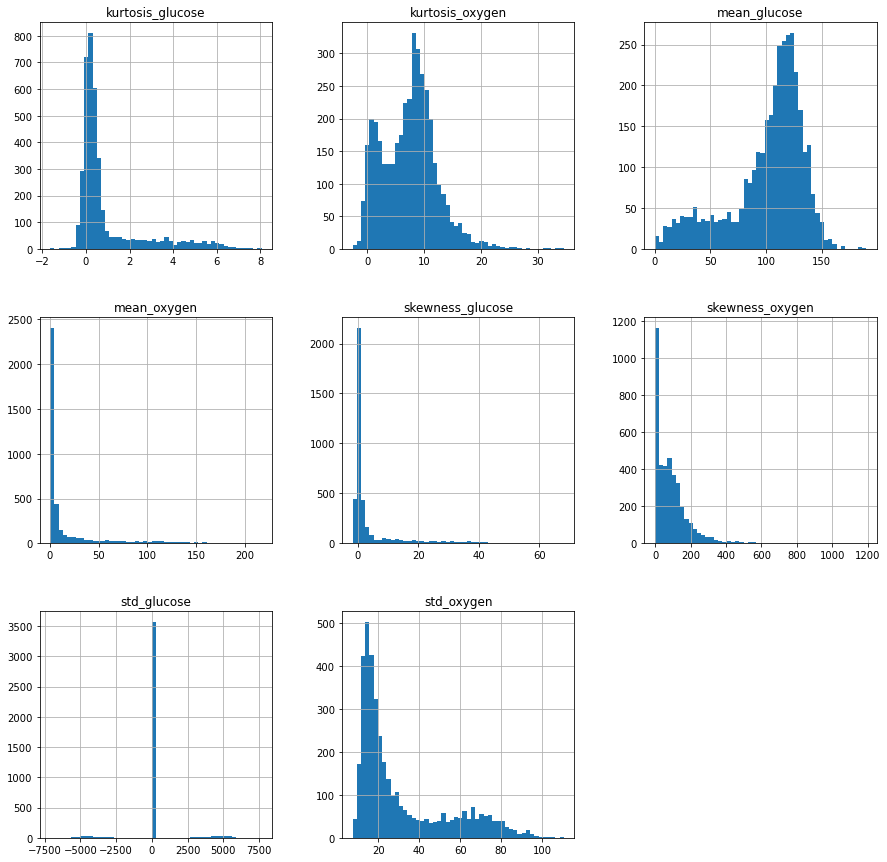

In [21]:
df[['mean_glucose', 
    'std_glucose', 
    'kurtosis_glucose', 
    'skewness_glucose',
    'mean_oxygen',
    'std_oxygen',
    'kurtosis_oxygen',
    'skewness_oxygen']].hist(figsize=(15, 15), bins=50)

Distribúcie medical_info PO predspracovaním

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x051A15C8>,
      dtype=object)

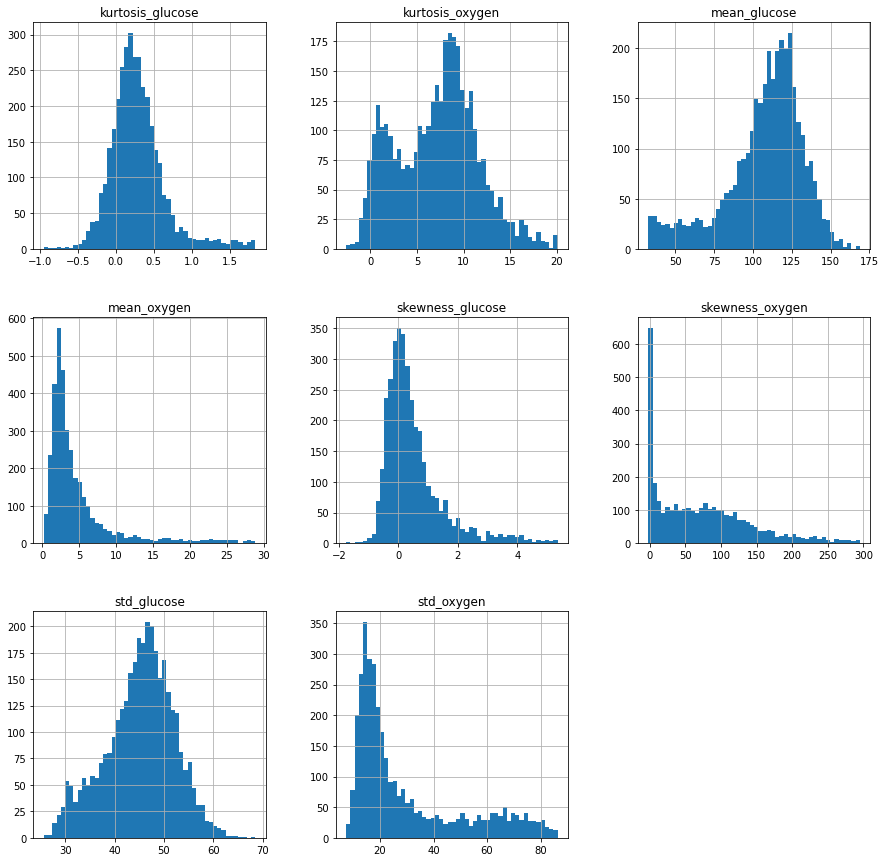

In [22]:
dataframe_train[['mean_glucose', 
                'std_glucose', 
                'kurtosis_glucose', 
                'skewness_glucose',
                'mean_oxygen',
                'std_oxygen',
                'kurtosis_oxygen',
                'skewness_oxygen']].hist(figsize=(15, 15), bins=50)

Môžeme si všimnúť zmeny takmer v každej dátovej množine. Najmä std_glucose, kurtosis_glucose, mean_oxygen, skewness_oxygen sú výrazne normalizovanejšie.

## Párová analýza dát II.

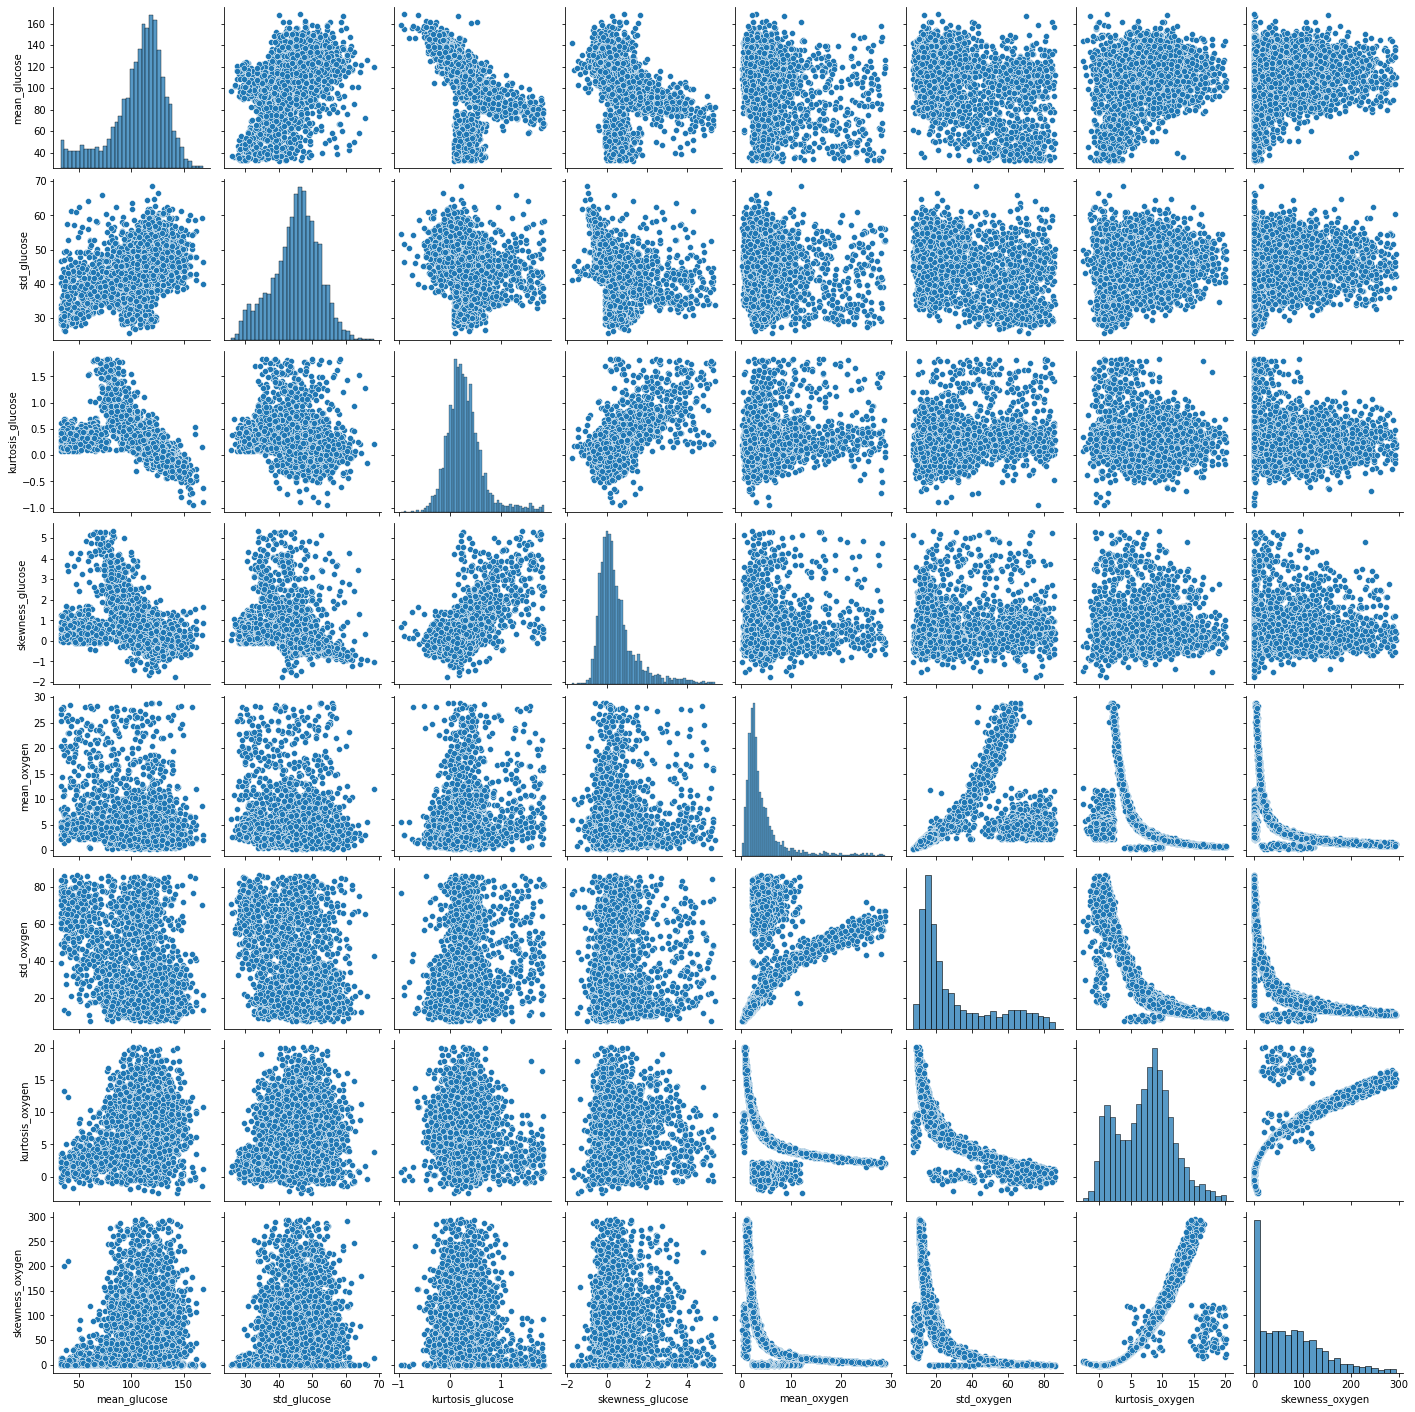

In [23]:
# vzťahy medzi medical_info atribútmi .. dáta sú viac reáne čiže niektoré atribúty medzi sebou korelujú menej
sns.pairplot(dataframe_train.dropna()[['mean_glucose', 
                          'std_glucose', 
                          'kurtosis_glucose', 
                          'skewness_glucose',
                          'mean_oxygen',
                          'std_oxygen',
                          'kurtosis_oxygen',
                          'skewness_oxygen']])

#### Na nasledujúcich grafov môžeme vidieť zlepšenie vďaka normalizácií pri predspracovaní.

##### skewness_oxygen

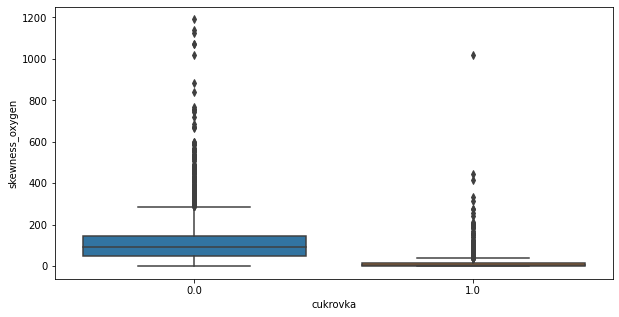

In [24]:
# dataset pred predspracovaním
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x='class', y='skewness_oxygen', data=df).set(xlabel='cukrovka', ylabel='skewness_oxygen')
plt.show()

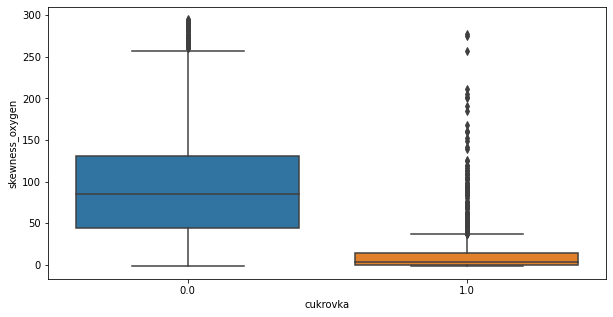

In [25]:
# dataset po predspracovaním
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x='class', y='skewness_oxygen', data=dataframe_train).set(xlabel='cukrovka', ylabel='skewness_oxygen')
plt.show()

##### std_glucose

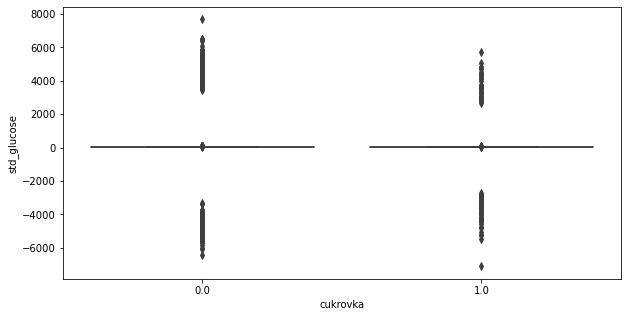

In [26]:
# dataset pred predspracovaním
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x='class', y='std_glucose', data=df).set(xlabel='cukrovka', ylabel='std_glucose')
plt.show()

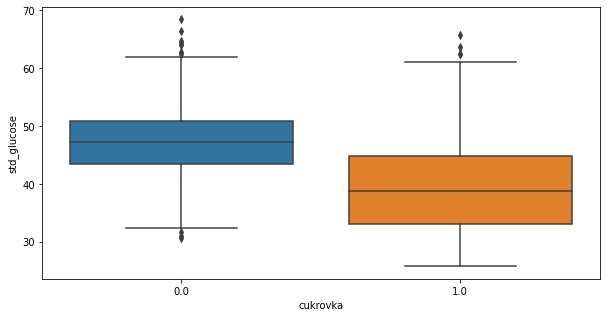

In [27]:
# dataset po predspracovaním
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(x='class', y='std_glucose', data=dataframe_train).set(xlabel='cukrovka', ylabel='std_glucose')
plt.show()

# IAU Tretia fáza: Strojové učenie

## Predspracovanie validačného datasetu

In [15]:
# pomocou pipeline zadefinovanej vyššie, zbehne celý proces predspracovania pre validačný dataset
text_ppl.fit(dfv,df_pv)

dataframe_valid = dataframe_merged
dataframe_merged = pd.DataFrame()

Stĺpec: mean_glucose
Identified outliers: 34 

Stĺpec: std_glucose
Identified outliers: 122 

Stĺpec: kurtosis_glucose
Identified outliers: 189 

Stĺpec: skewness_glucose
Identified outliers: 206 

Stĺpec: mean_oxygen
Identified outliers: 200 

Stĺpec: std_oxygen
Identified outliers: 6 

Stĺpec: kurtosis_oxygen
Identified outliers: 8 

Stĺpec: skewness_oxygen
Identified outliers: 39 



## Manuálne vytvorenie a vyhodnotenie rozhodovacích pravidiel pre klasifikáciu

Na základe pozorovaných závislostí v dátach sme určili pravidlá pre určovanie stavu pacienta ohladom cukrovky a následne sme tieto pravidlá vyhodnotili pomocou metrík accuracy, precision a recall.

In [21]:
# najprv si vytvoríme trénovacie a testovacie vzorky
y_train = dataframe_train['class'].values
X_train = dataframe_train.drop('class', axis=1)

y_valid = dataframe_valid['class'].values
X_valid = dataframe_valid.drop('class', axis=1)

Najprv sme vyskúšali 1R pravidlo, čiže len s jedným atribútom a výsledky podľa metrík dopadli uspokojivo.

In [201]:
def oneRuleTree(dataframe):
    array_np = np.array([])
    for i in dataframe.kurtosis_glucose:
        if i <= 0.4:
            array_np = np.append(array_np,0)
        else:
            array_np = np.append(array_np,1)
    return array_np

score_or_t = oneRuleTree(X_train)

print('TRAIN\n')

print('Acuraccy score:', accuracy_score(y_train, score_or_t, normalize=True))

print('\nPrecision score:', precision_score(y_train, score_or_t, average='weighted'))

print('\nRecall score:', recall_score(y_train, score_or_t, average='weighted'))

score_or_v = oneRuleTree(X_valid)

print('\nVALID\n')

print('Acuraccy score:',accuracy_score(y_valid, score_or_v, normalize=True))

print('\nPrecision score:', precision_score(y_valid, score_or_v, average='weighted'))

print('\nRecall score:', recall_score(y_valid, score_or_v))

TRAIN

Acuraccy score: 0.6991777714771761

Precision score: 0.7179373686302345

Recall score: 0.6991777714771761

VALID

Acuraccy score: 0.7139197267292912

Precision score: 0.7400395730837992

Recall score: 0.6056782334384858


Potom sme spravili komplikovanejší strom zahrňujúci viacero atribútov a ich kombinácie a výsledné hodnoty podľa metrík sa mierne zlepšili.

In [200]:
def moreRulesTree(dataframe):
    array_np = np.array([])
    for index, row in dataframe.iterrows():
        if row['skewness_glucose'] <= 0.65:
            if row['kurtosis_glucose'] <= 0.4:
                if row['std_glucose'] <= 60:
                    array_np = np.append(array_np,0)
                else:
                    array_np = np.append(array_np,1)
            else:
                array_np = np.append(array_np,1)
        else:
            array_np = np.append(array_np,1)
    return array_np


score_mr_t = moreRulesTree(X_train)

print('TRAIN\n')

print('Acuraccy score:', accuracy_score(y_train, score_mr_t, normalize=True))

print('\nPrecision score:', precision_score(y_train, score_mr_t, average='weighted'))

print('\nRecall score:', recall_score(y_train, score_mr_t))

score_mr_v = moreRulesTree(X_valid)

print('\nVALID\n')

print('Acuraccy score:',accuracy_score(y_valid, score_mr_v, normalize=True))

print('\nPrecision score:', precision_score(y_valid, score_mr_v, average='weighted'))

print('\nRecall score:', recall_score(y_valid, score_mr_v, average='weighted'))

TRAIN

Acuraccy score: 0.6818826197901899

Precision score: 0.7558507012904523

Recall score: 0.7008928571428571

VALID

Acuraccy score: 0.6985482493595218

Precision score: 0.7804968911035894

Recall score: 0.6985482493595218


## Natrénovanie a vyhodnotenie klasifikátora s využitím rozhodovacích stromov

Najprv sme spravili strom s neurčeným max_depth čo by viedlo k overfitting.

[Text(1259.9988984165175, 1857.3, 'X[20] <= 34.81\nentropy = 0.818\nsamples = 3527\nvalue = [2631, 896]'),
 Text(591.7256392681289, 1766.6999999999998, 'X[15] <= 76.684\nentropy = 0.366\nsamples = 2531\nvalue = [2354, 177]'),
 Text(99.91047448522829, 1676.1, 'X[17] <= 0.684\nentropy = 0.737\nsamples = 77\nvalue = [16, 61]'),
 Text(59.94628469113698, 1585.5, 'X[17] <= 0.159\nentropy = 0.151\nsamples = 46\nvalue = [1, 45]'),
 Text(39.96418979409132, 1494.8999999999999, 'X[21] <= 8.18\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(19.98209489704566, 1404.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(59.94628469113698, 1404.3, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(79.92837958818264, 1494.8999999999999, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42]'),
 Text(139.8746642793196, 1585.5, 'X[17] <= 1.545\nentropy = 0.999\nsamples = 31\nvalue = [15, 16]'),
 Text(119.89256938227396, 1494.8999999999999, 'X[20] <= 20.125\nentropy = 0.811\nsamples = 20\nvalue = [15, 5

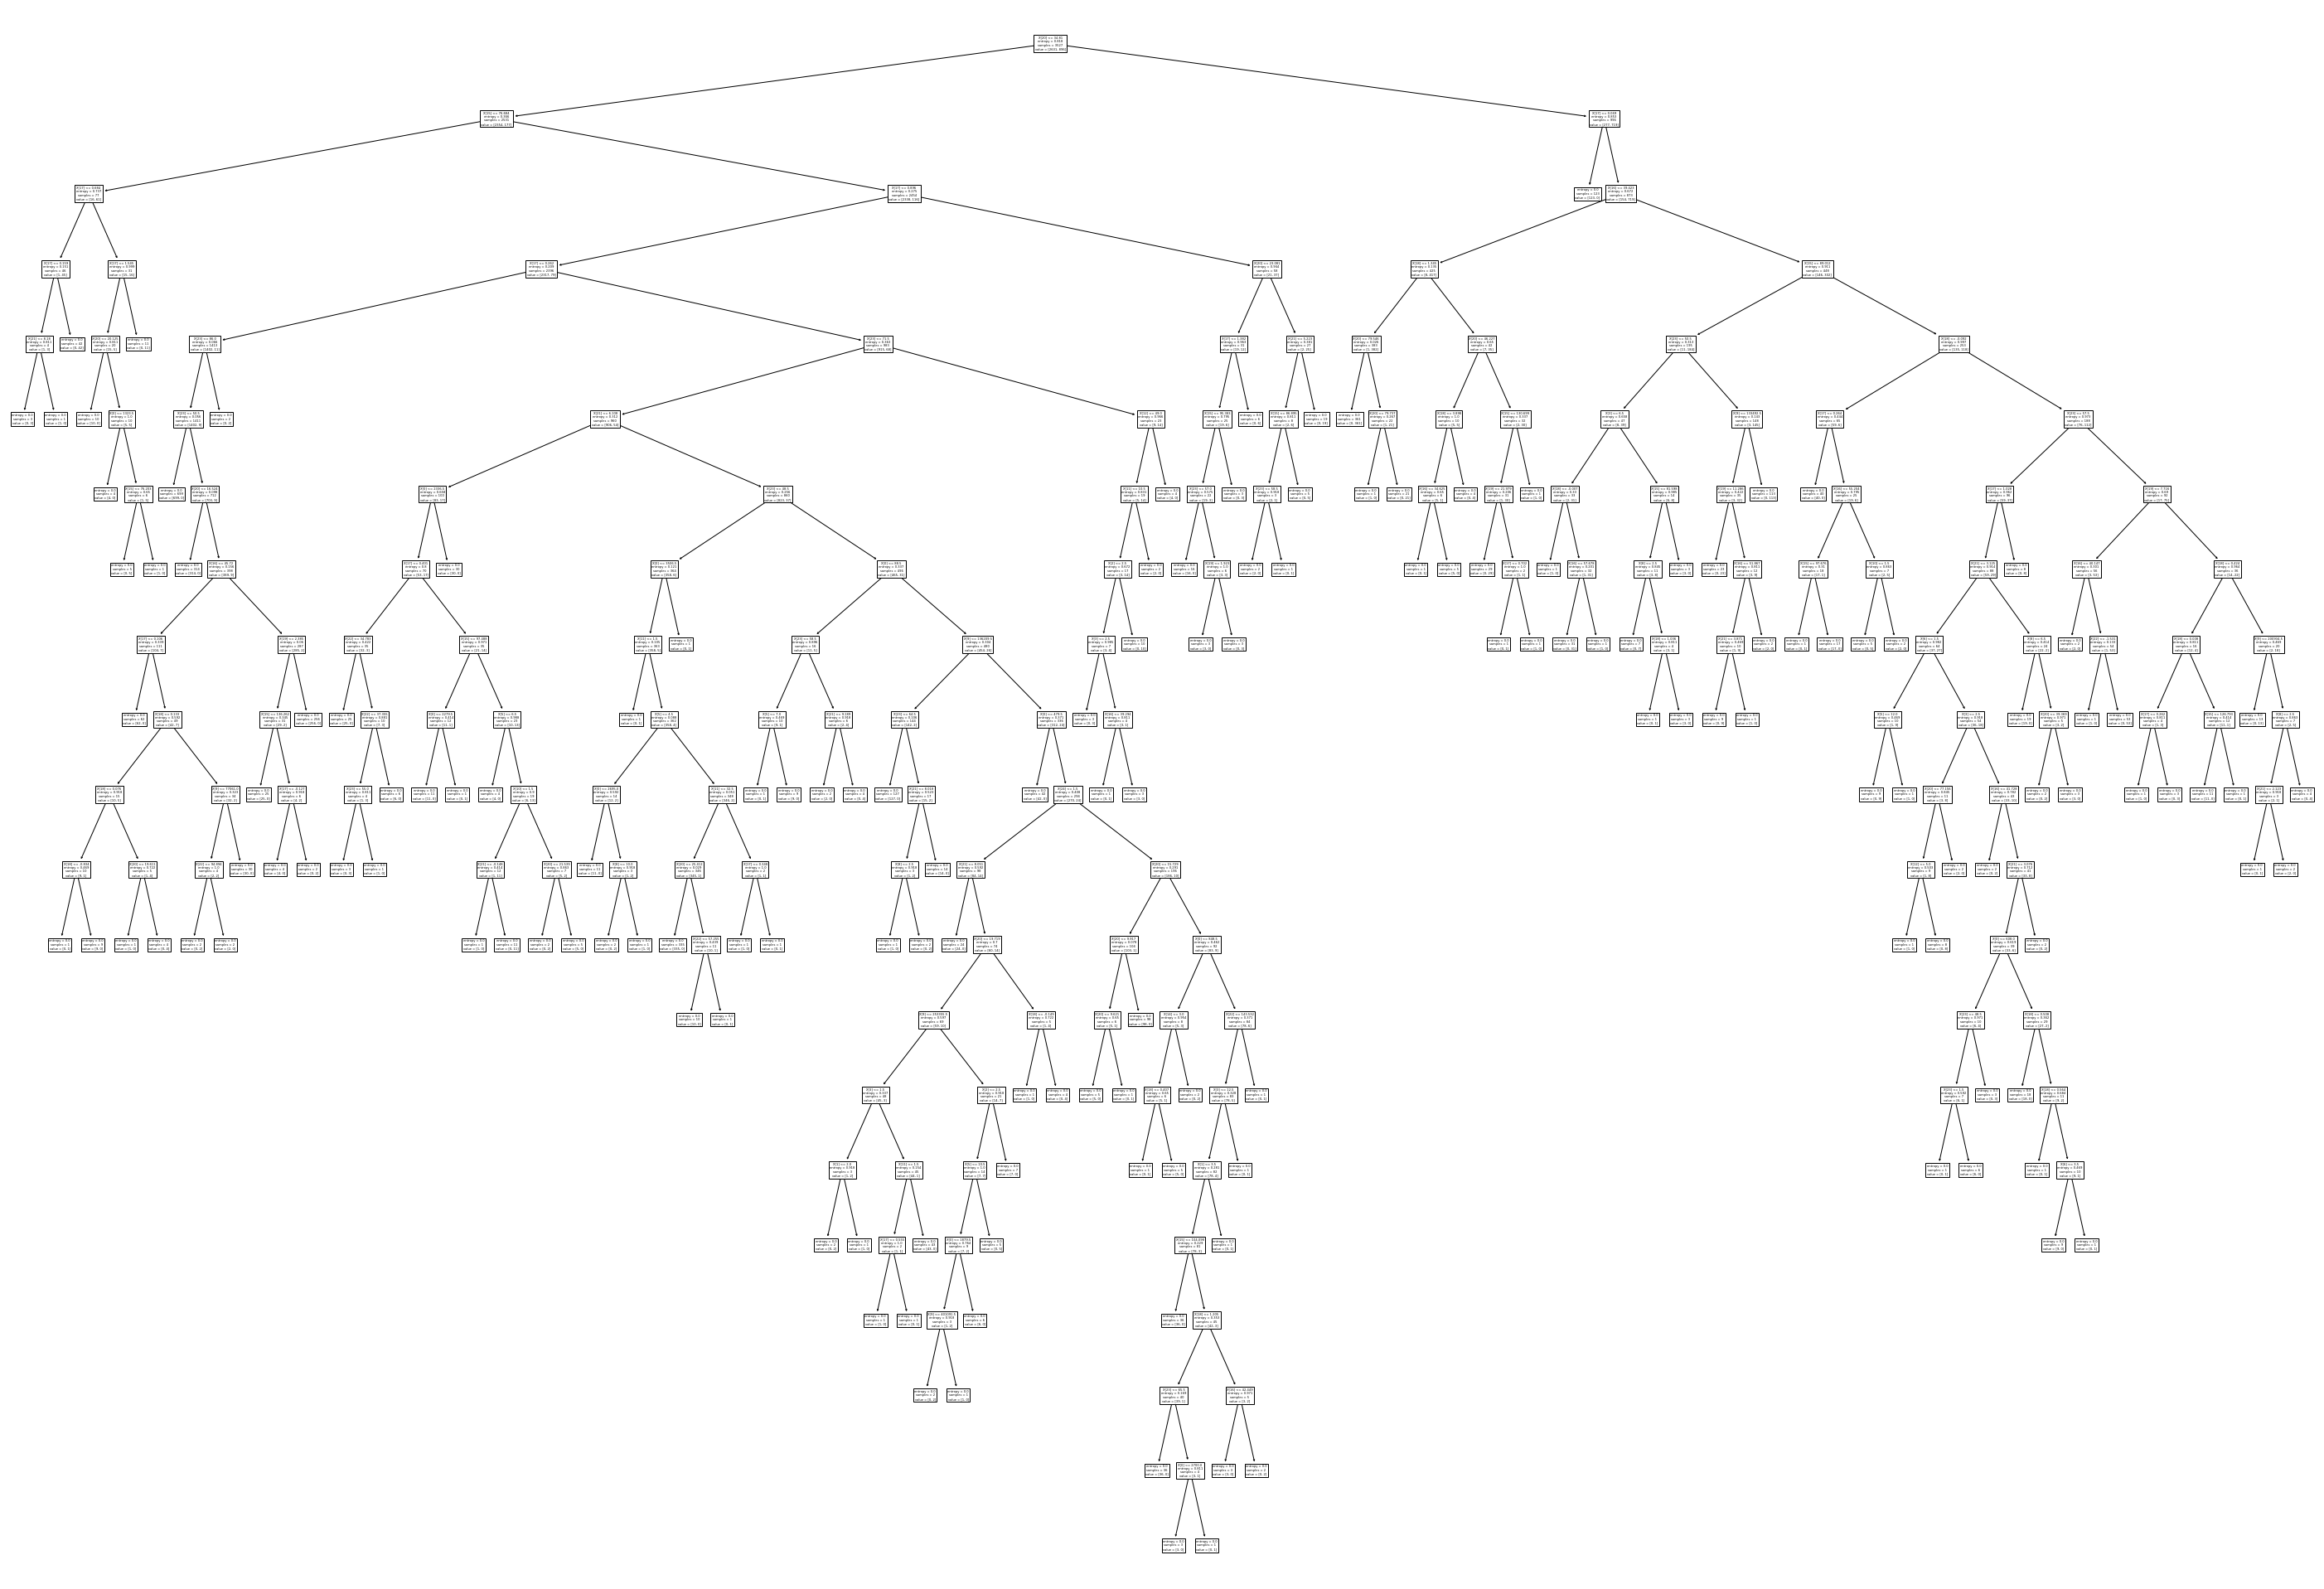

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

cls = DecisionTreeClassifier(criterion='entropy')

cls.fit(X_train, y_train)

predct_t = cls.predict(X_train)

predct_v = cls.predict(X_valid)

plt.rcParams['figure.figsize'] = 50, 35
tree.plot_tree(cls)

Na metrikách ktoré vyhodnotili strom vytvorený pomocou DTC algorimu, môžeme jednoznačne vidieť že sa jedná o overfitting no výsledky sú aj tak priaznivejšie oproti nami manuálne vytvorenými stromami.

In [235]:
#Porovnanie na základe bodov z metrík Accuracy, Precission, Recall:

print('\nDTC tree scores:\n')

print('TRAIN')
print('Acuraccy score:', accuracy_score(y_train, predct_t, normalize=True))
print('Precision score:', precision_score(y_train, predct_t, average='weighted'))
print('Recall score:', recall_score(y_train, predct_t))

print('\nVALID')
print('Acuraccy score:',accuracy_score(y_valid, predct_v, normalize=True))
print('Precision score:', precision_score(y_valid, predct_v, average='weighted'))
print('Recall score:', recall_score(y_valid, predct_v, average='weighted'))
print('-------------------------------------------------------')

print('\nOne rule tree scores:\n')

print('TRAIN')
print('Acuraccy score:', accuracy_score(y_train, score_or_t, normalize=True))
print('Precision score:', precision_score(y_train, score_or_t, average='weighted'))
print('Recall score:', recall_score(y_train, score_or_t, average='weighted'))

print('\nVALID')
print('Acuraccy score:',accuracy_score(y_valid, score_or_v, normalize=True))
print('Precision score:', precision_score(y_valid, score_or_v, average='weighted'))
print('Recall score:', recall_score(y_valid, score_or_v, average='weighted'))
print('-------------------------------------------------------')

print('\nMore rules tree scores:\n')

print('TRAIN')
print('Acuraccy score:', accuracy_score(y_train, score_mr_t, normalize=True))
print('Precision score:', precision_score(y_train, score_mr_t, average='weighted'))
print('Recall score:', recall_score(y_train, score_mr_t))

print('\nVALID')
print('Acuraccy score:',accuracy_score(y_valid, score_mr_v, normalize=True))
print('Precision score:', precision_score(y_valid, score_mr_v, average='weighted'))
print('Recall score:', recall_score(y_valid, score_mr_v, average='weighted'))


DTC tree scores:

TRAIN
Acuraccy score: 1.0
Precision score: 1.0
Recall score: 1.0

VALID
Acuraccy score: 0.8420153714773698
Precision score: 0.8680364837033464
Recall score: 0.8420153714773698
-------------------------------------------------------

One rule tree scores:

TRAIN
Acuraccy score: 0.6991777714771761
Precision score: 0.7179373686302345
Recall score: 0.6991777714771761

VALID
Acuraccy score: 0.7139197267292912
Precision score: 0.7400395730837992
Recall score: 0.7139197267292912
-------------------------------------------------------

More rules tree scores:

TRAIN
Acuraccy score: 0.6818826197901899
Precision score: 0.7558507012904523
Recall score: 0.7008928571428571

VALID
Acuraccy score: 0.6985482493595218
Precision score: 0.7804968911035894
Recall score: 0.6985482493595218


## Optimalizácia hyperparametrov

### Na základe skúšania a testovania stromov s určitými parametrami sme dospeli k trom najlepším.

Nastavením 'max_depth' na hodnotu 3 s výsledky metrík výrazne zlepšili oproti vštekým predchádzajúcim stromom.

TRAIN
Acuraccy score: 0.937056988942444
Precision score: 0.9373053380802949
Recall score: 0.937056988942444

VALID
Acuraccy score: 0.9453458582408198
Precision score: 0.9470239143165875
Recall score: 0.9453458582408198

10 cross validation:  0.9308298995621941


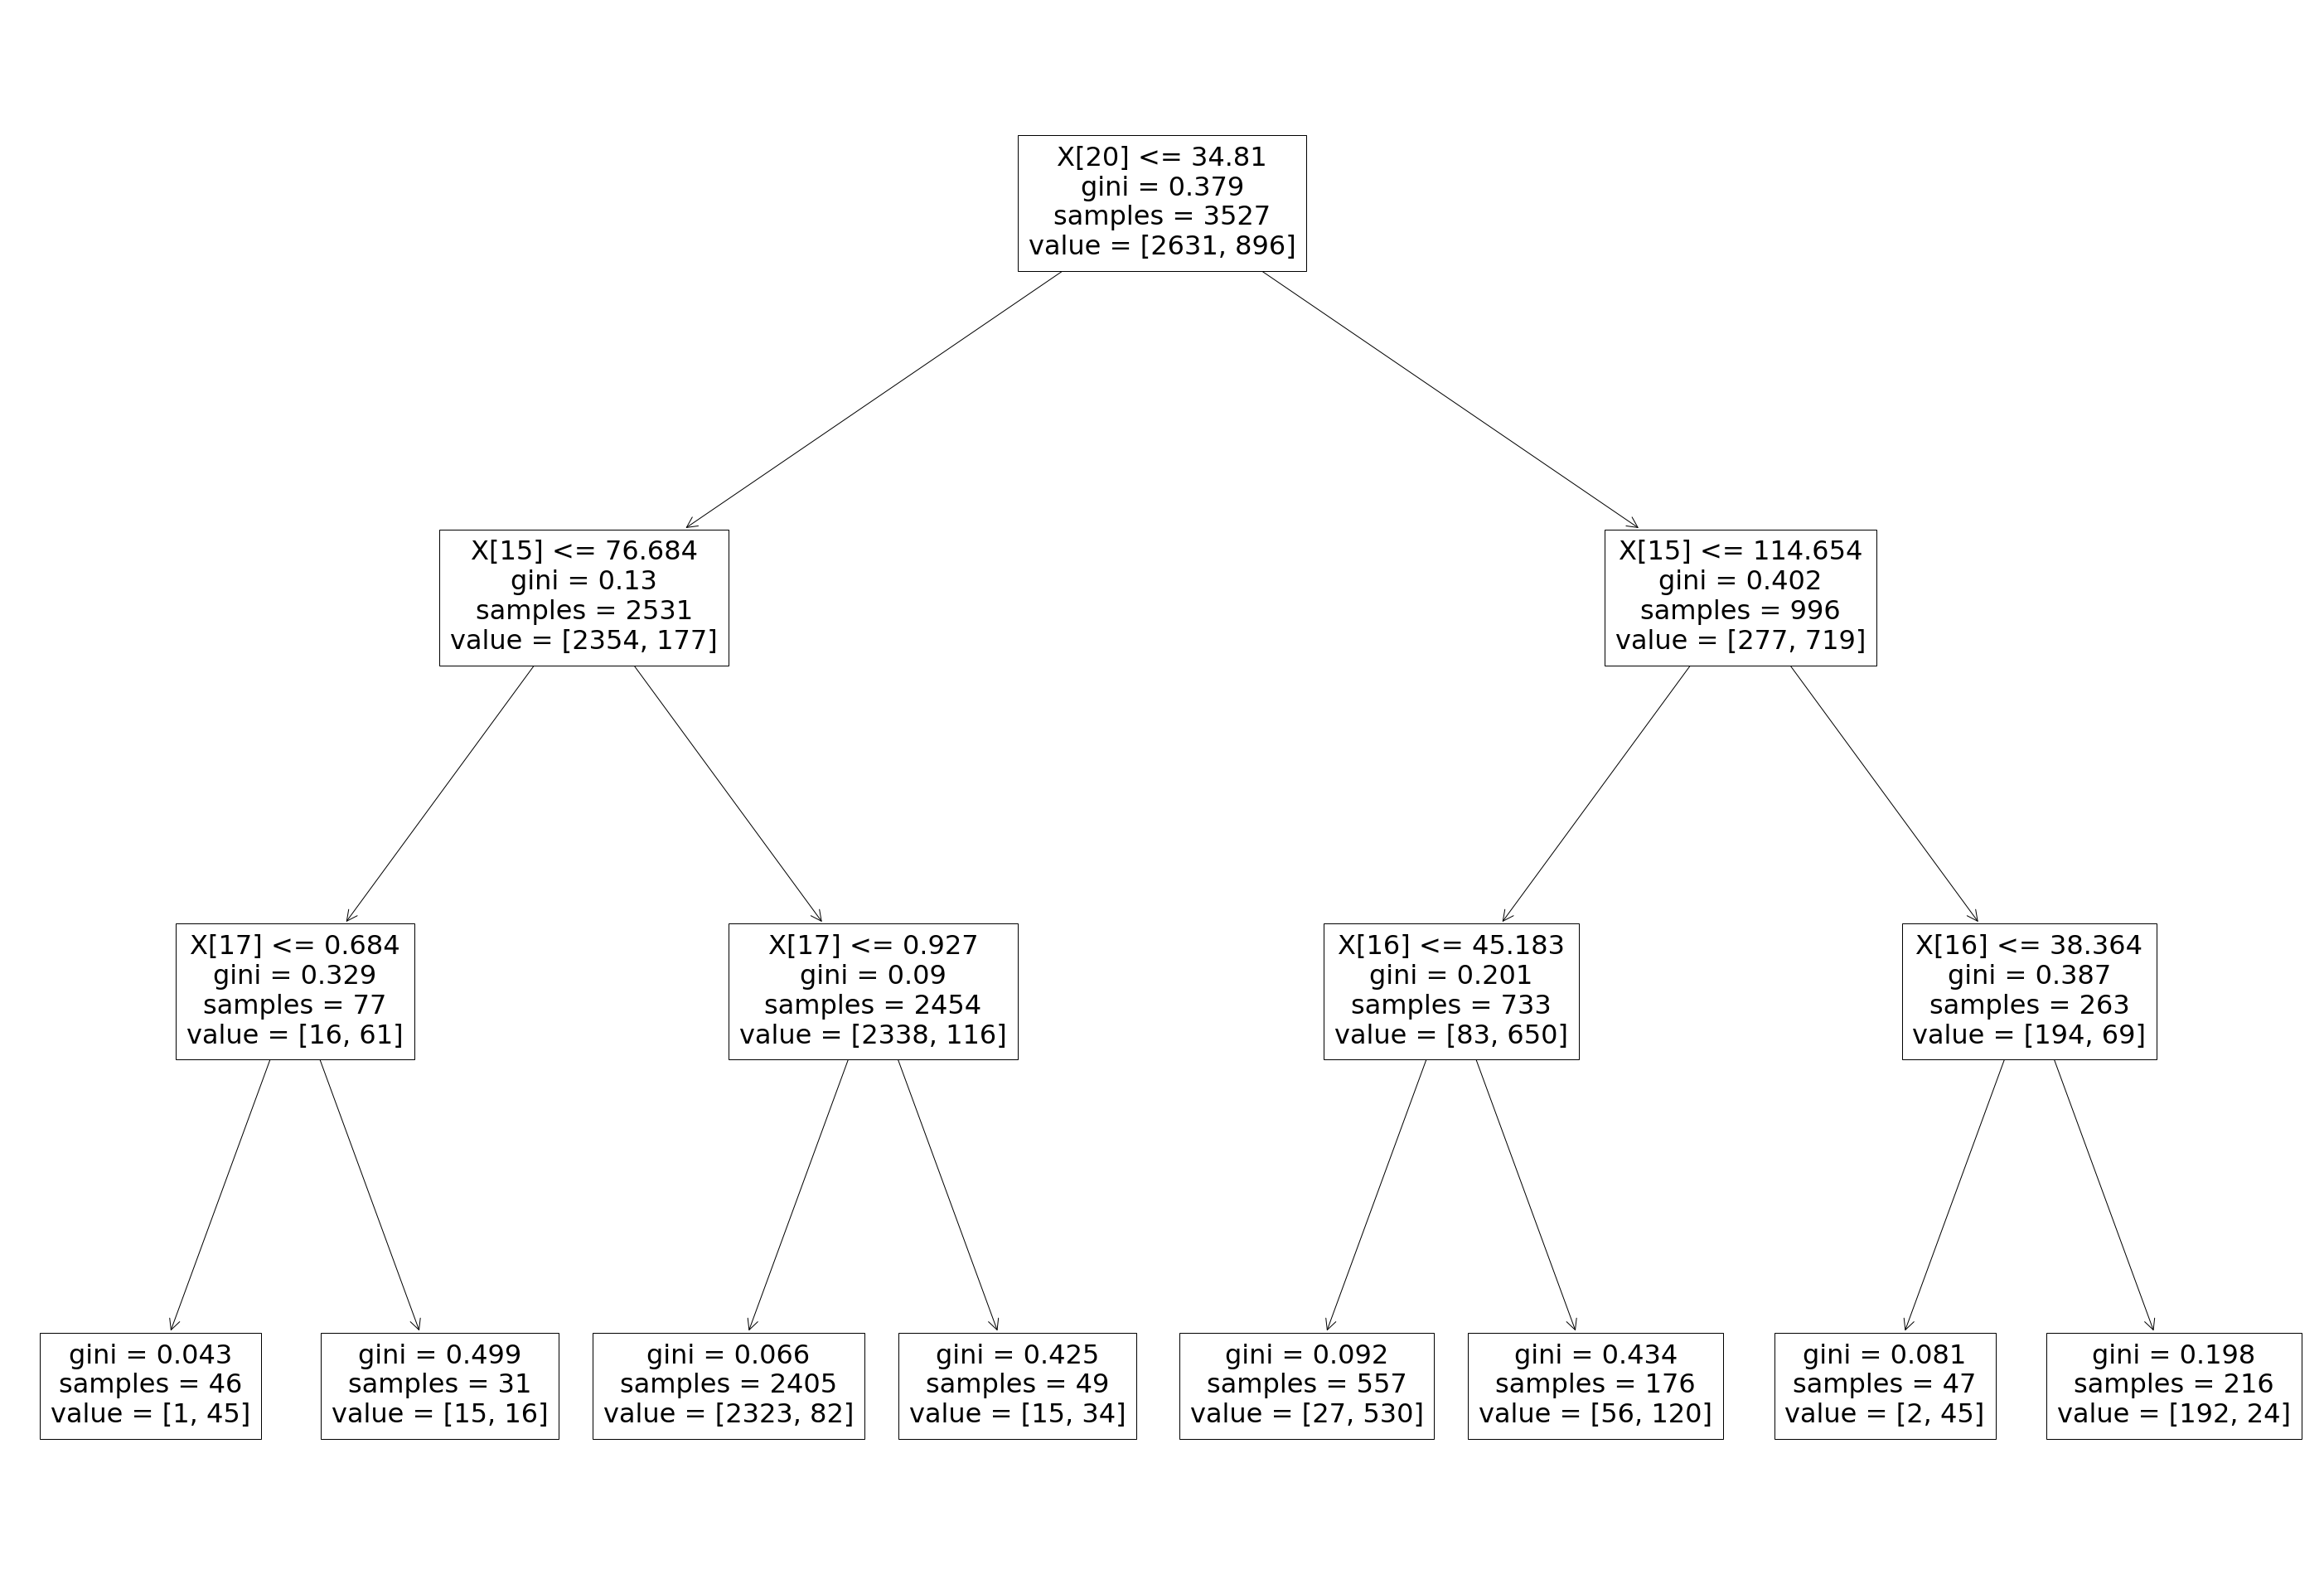

In [277]:
cls1 = DecisionTreeClassifier(max_depth = 3) 
cls1.fit(X_train, y_train)

tree.plot_tree(cls1)

predct1_t = cls1.predict(X_train)
predct1_v = cls1.predict(X_valid)

print('TRAIN')
print('Acuraccy score:', accuracy_score(y_train, predct1_t, normalize=True))
print('Precision score:', precision_score(y_train, predct1_t, average='weighted'))
print('Recall score:', recall_score(y_train, predct1_t, average='weighted'))

print('\nVALID')
print('Acuraccy score:',accuracy_score(y_valid, predct1_v, normalize=True))
print('Precision score:', precision_score(y_valid, predct1_v, average='weighted'))
print('Recall score:', recall_score(y_valid, predct1_v, average='weighted'))

# krížová validácia na trénovacej množine
score_cross_validation = cross_val_score(cls1, X_train, y_train, cv=10)
print('\n10 cross validation: ',score_cross_validation.sum() / 10)

Zvýšením 'max_depth' na hodnotu 5 a pridaním 'random_state' s hodnotou 1, sme docielili lepšie výsledky na trénovacej množine približne o 1.8 v každej metrike a jemné zvýšenie aj vo validačnej množine.

TRAIN
Acuraccy score: 0.9560533030904451
Precision score: 0.9557054922665271
Recall score: 0.9560533030904451

VALID
Acuraccy score: 0.9479077711357814
Precision score: 0.947623181336356
Recall score: 0.9479077711357814

10 cross validation:  0.9356497875354108


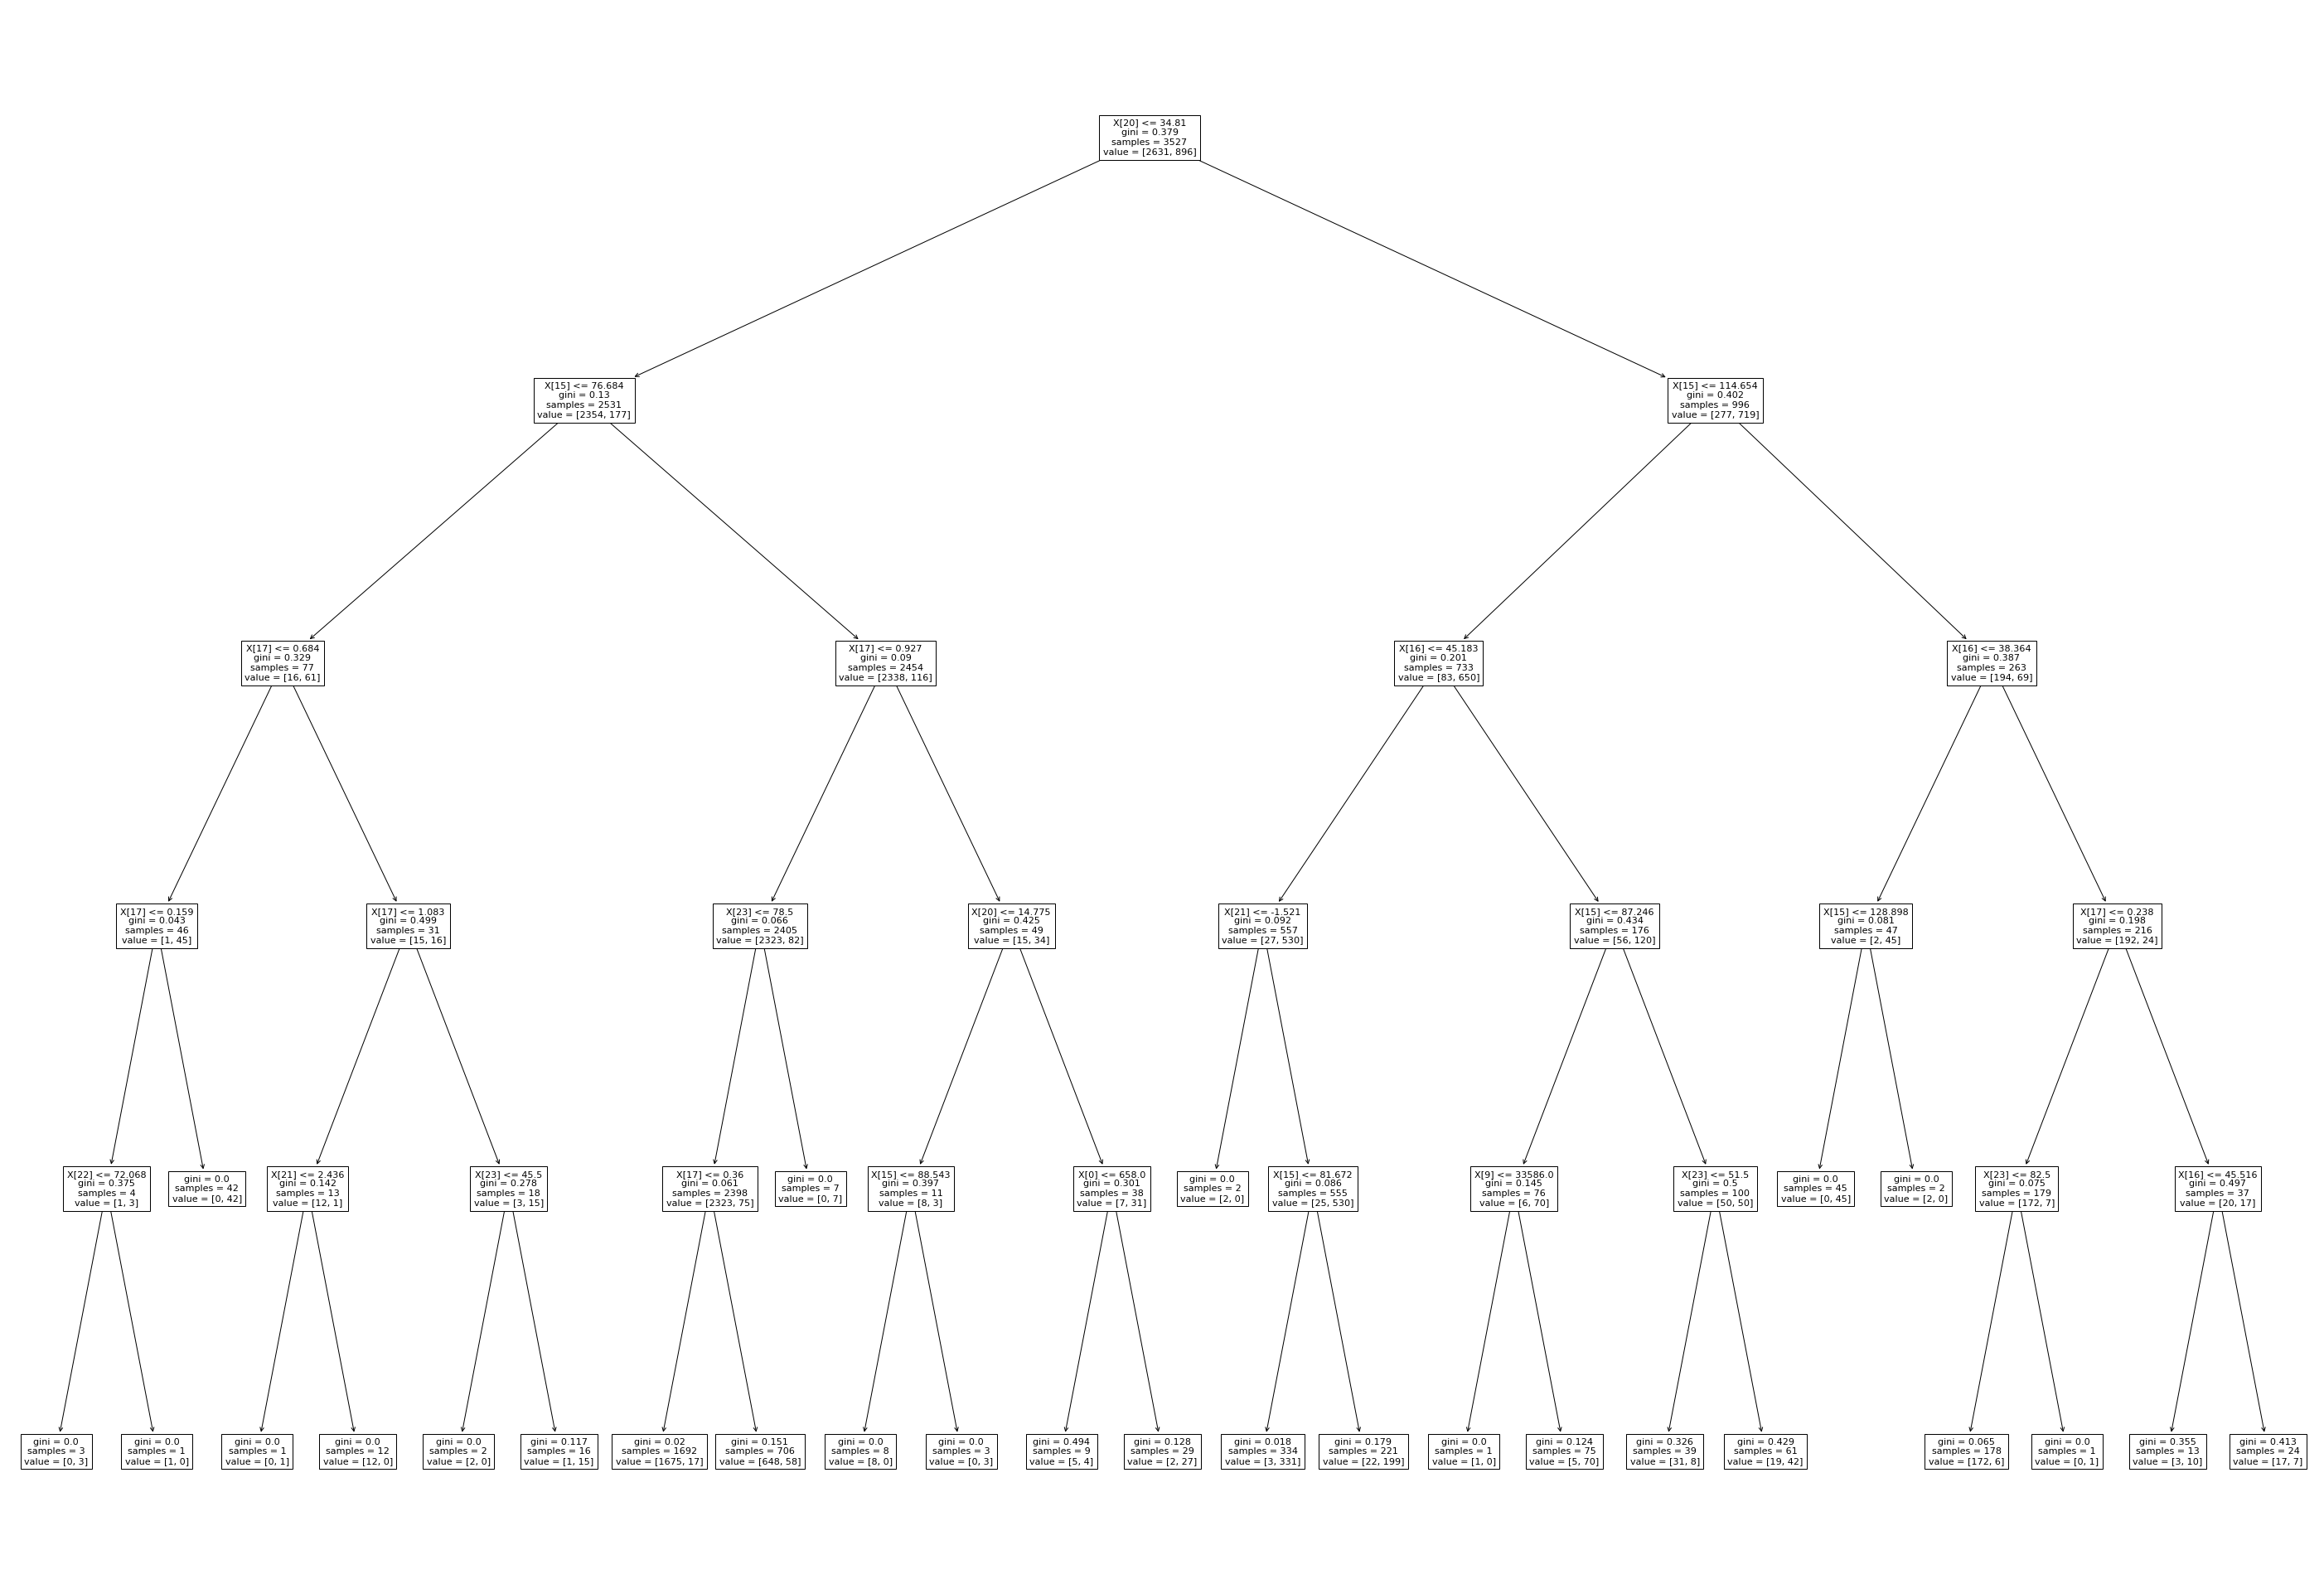

In [278]:
cls2 = DecisionTreeClassifier(max_depth=5, random_state=1)
cls2.fit(X_train, y_train)

tree.plot_tree(cls2)

predct2_t = cls2.predict(X_train)
predct2_v = cls2.predict(X_valid)

print('TRAIN')
print('Acuraccy score:', accuracy_score(y_train, predct2_t, normalize=True))
print('Precision score:', precision_score(y_train, predct2_t, average='weighted'))
print('Recall score:', recall_score(y_train, predct2_t, average='weighted'))

print('\nVALID')
print('Acuraccy score:',accuracy_score(y_valid, predct2_v, normalize=True))
print('Precision score:', precision_score(y_valid, predct2_v, average='weighted'))
print('Recall score:', recall_score(y_valid, predct2_v, average='weighted'))

# krížová validácia na trénovacej množine
score_cross_validation = cross_val_score(cls2, X_train, y_train, cv=10)
print('\n10 cross validation: ',score_cross_validation.sum() / 10)

Nahradením 'max_depth' parametra 'max_leaf_nodes' parametrom s hodnotou 25 sme dosiahli najlepšie výsledky na validačnej vzorke spomedzi ostatných stromov a ich parametrov.

TRAIN
Acuraccy score: 0.9591721009356393
Precision score: 0.9589318991534547
Recall score: 0.9591721009356393

VALID
Acuraccy score: 0.9513236549957301
Precision score: 0.9518833660486851
Recall score: 0.9513236549957301

10 cross validation:  0.9430232745300025


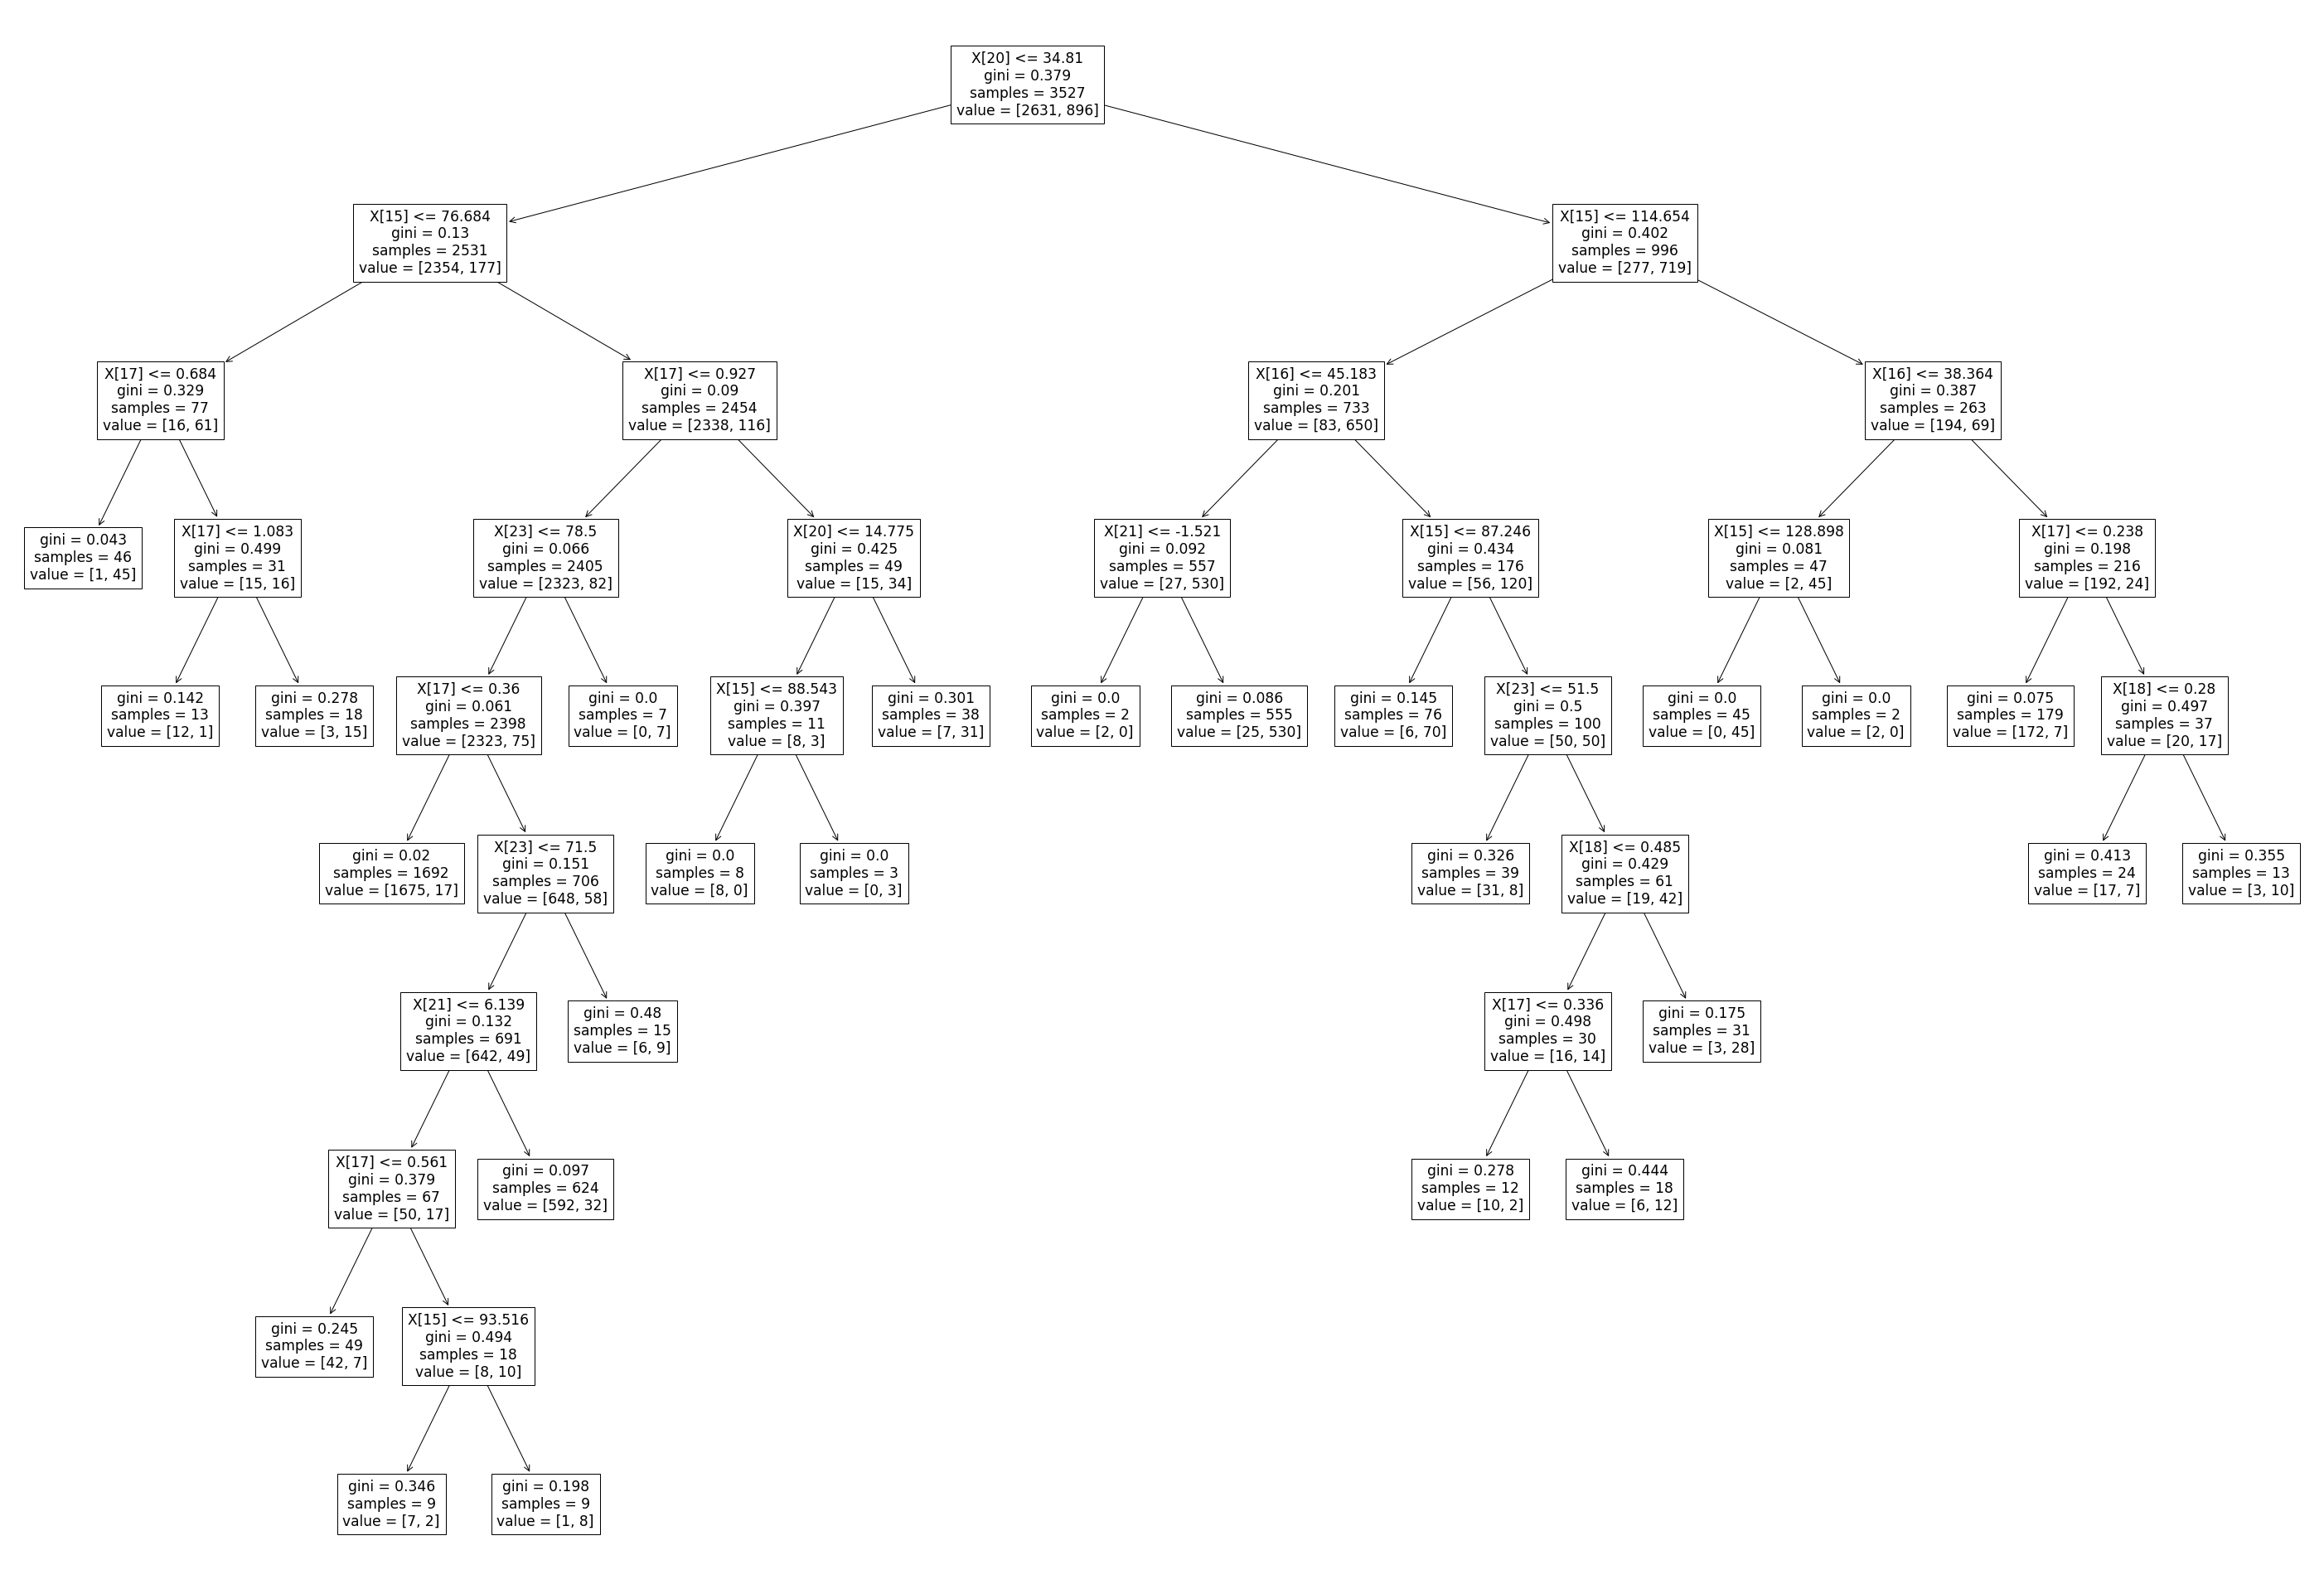

In [279]:
cls3 = DecisionTreeClassifier(random_state=1, max_leaf_nodes=25)
cls3.fit(X_train, y_train)

tree.plot_tree(cls3)

predct3_t = cls3.predict(X_train)
predct3_v = cls3.predict(X_valid)

print('TRAIN')
print('Acuraccy score:', accuracy_score(y_train, predct3_t, normalize=True))
print('Precision score:', precision_score(y_train, predct3_t, average='weighted'))
print('Recall score:', recall_score(y_train, predct3_t, average='weighted'))

print('\nVALID')
print('Acuraccy score:',accuracy_score(y_valid, predct3_v, normalize=True))
print('Precision score:', precision_score(y_valid, predct3_v, average='weighted'))
print('Recall score:', recall_score(y_valid, predct3_v, average='weighted'))

# krížová validácia na trénovacej množine
score_cross_validation = cross_val_score(cls3, X_train, y_train, cv=10)
print('\n10 cross validation: ',score_cross_validation.sum() / 10)

Pri nastavovaní hyperparametrov algoritmu sme využite 10-násobnú krížovú validáciu na trénovacej množine a zistili sme že celkovo najlepšie výsledky dosiahol strom 3 aj na základe metrík aj krížovej validácie.